In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings("ignore")

# IMPORTING THE DATA

TRAIN DATA

In [2]:
df_train=pd.read_csv("train_data.csv")
df_train.rename(columns={'Unnamed: 0':'index'},inplace=True)
print(df_train.shape)
df_train.head()

(8239, 563)


index  tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0    356           0.286433          -0.023843          -0.122738   
1   4482           0.333258          -0.001307          -0.166581   
2  10012           0.266797          -0.018683          -0.101142   
3   4386           0.276363          -0.020289          -0.113701   
4   3751           0.268231          -0.004146          -0.094503   

   tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0         -0.915584         -0.710794         -0.880226         -0.932429   
1         -0.034498         -0.062471         -0.283268         -0.059698   
2         -0.990874         -0.989001         -0.987255         -0.991659   
3         -0.995733         -0.939094         -0.984418         -0.997013   
4          0.473123          0.452403         -0.152600          0.450082   

   tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  ...  fBodyBodyGyroJerkMag-skewness()  \
0         -0.720314         -0.881657  ...                        -0.357772   
1         -0.174912         -0.338661  ...                         0.308324   
2         -0.987859         -0.985430  ...                        -0.388442   
3         -0.936180         -0.983728  ...                         0.054212   
4          0.482764         -0.239383  ...                        -0.139639   

   fBodyBodyGyroJerkMag-kurtosis()  angle(tBodyAccMean,gravity)  \
0                        -0.752582                    -0.217502   
1                         0.048713                    -0.191360   
2                        -0.703577                    -0.152601   
3                        -0.430753                     0.029986   
4                        -0.558550                     0.278372   

   angle(tBodyAccJerkMean),gravityMean)  angle(tBodyGyroMean,gravityMean)  \
0                              0.229826                          0.154791   
1                             -0.580316                         -0.423810   
2                              0.162091                         -0.628052   
3                             -0.094248                          0.025219   
4                              0.363240                          0.885432   

   angle(tBodyGyroJerkMean,gravityMean)  angle(X,gravityMean)  \
0                             -0.431134             -0.761361   
1                              0.689597             -0.765469   
2                              0.551795              0.587768   
3                             -0.408070             -0.819227   
4                              0.848414             -0.779760   

   angle(Y,gravityMean)  angle(Z,gravityMean)  subject  
0              0.250580             -0.046895        3  
1              0.237371             -0.067771       22  
2             -0.536508             -0.469193       24  
3              0.213794             -0.031301       22  
4              0.249384              0.035484       19  

[5 rows x 563 columns]

In [3]:
df_train_labels=pd.read_csv("train_labels.csv")
df_train_labels.rename(columns={'Unnamed: 0':'index'},inplace=True)
print(df_train_labels.shape)
df_train_labels.head()

(8239, 2)


index            Activity
0    356            STANDING
1   4482             WALKING
2  10012              LAYING
3   4386            STANDING
4   3751  WALKING_DOWNSTAIRS

In [4]:
df_merged=df_train.merge(df_train_labels,on='index')
print(df_merged.shape)
df_merged.head()

(8239, 564)


index  tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0    356           0.286433          -0.023843          -0.122738   
1   4482           0.333258          -0.001307          -0.166581   
2  10012           0.266797          -0.018683          -0.101142   
3   4386           0.276363          -0.020289          -0.113701   
4   3751           0.268231          -0.004146          -0.094503   

   tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0         -0.915584         -0.710794         -0.880226         -0.932429   
1         -0.034498         -0.062471         -0.283268         -0.059698   
2         -0.990874         -0.989001         -0.987255         -0.991659   
3         -0.995733         -0.939094         -0.984418         -0.997013   
4          0.473123          0.452403         -0.152600          0.450082   

   tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  ...  fBodyBodyGyroJerkMag-kurtosis()  \
0         -0.720314         -0.881657  ...                        -0.752582   
1         -0.174912         -0.338661  ...                         0.048713   
2         -0.987859         -0.985430  ...                        -0.703577   
3         -0.936180         -0.983728  ...                        -0.430753   
4          0.482764         -0.239383  ...                        -0.558550   

   angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
0                    -0.217502                              0.229826   
1                    -0.191360                             -0.580316   
2                    -0.152601                              0.162091   
3                     0.029986                             -0.094248   
4                     0.278372                              0.363240   

   angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
0                          0.154791                             -0.431134   
1                         -0.423810                              0.689597   
2                         -0.628052                              0.551795   
3                          0.025219                             -0.408070   
4                          0.885432                              0.848414   

   angle(X,gravityMean)  angle(Y,gravityMean)  angle(Z,gravityMean)  subject  \
0             -0.761361              0.250580             -0.046895        3   
1             -0.765469              0.237371             -0.067771       22   
2              0.587768             -0.536508             -0.469193       24   
3             -0.819227              0.213794             -0.031301       22   
4             -0.779760              0.249384              0.035484       19   

             Activity  
0            STANDING  
1             WALKING  
2              LAYING  
3            STANDING  
4  WALKING_DOWNSTAIRS  

[5 rows x 564 columns]

TEST DATA

In [5]:
df_test=pd.read_csv("test_data.csv")
df_test.rename(columns={'Unnamed: 0':'index'},inplace=True)
print(df_test.shape)
df_test.head()

(2060, 563)


index  tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0   6597           0.238337          -0.039950          -0.158257   
1   7609           0.125920          -0.027658          -0.050069   
2  10110           0.281630          -0.012995          -0.082664   
3   1924           0.276540          -0.014060          -0.101588   
4   5088           0.286017          -0.017170          -0.122960   

   tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0          0.283615          0.226575         -0.133216          0.244607   
1          0.082014          0.109970         -0.199439         -0.019578   
2         -0.993584         -0.924414         -0.916643         -0.994897   
3         -0.996289         -0.971684         -0.985675         -0.996893   
4         -0.997019         -0.972621         -0.994163         -0.997444   

   tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  ...  fBodyBodyGyroJerkMag-skewness()  \
0          0.213950         -0.168971  ...                        -0.189878   
1          0.006470         -0.207727  ...                        -0.204344   
2         -0.919702         -0.910742  ...                        -0.385800   
3         -0.969509         -0.987522  ...                        -0.256690   
4         -0.974594         -0.993933  ...                        -0.628981   

   fBodyBodyGyroJerkMag-kurtosis()  angle(tBodyAccMean,gravity)  \
0                        -0.585136                     0.095017   
1                        -0.648088                     0.488927   
2                        -0.751006                    -0.005078   
3                        -0.716679                     0.029915   
4                        -0.854965                     0.006138   

   angle(tBodyAccJerkMean),gravityMean)  angle(tBodyGyroMean,gravityMean)  \
0                             -0.683623                          0.936870   
1                             -0.440765                          0.138569   
2                              0.076865                         -0.094954   
3                              0.132456                          0.599696   
4                             -0.110332                          0.244955   

   angle(tBodyGyroJerkMean,gravityMean)  angle(X,gravityMean)  \
0                             -0.635852             -0.749472   
1                             -0.123791             -0.670132   
2                              0.661824             -0.847582   
3                              0.740406             -0.795674   
4                              0.227095             -0.636789   

   angle(Y,gravityMean)  angle(Z,gravityMean)  subject  
0              0.235484              0.126574       28  
1              0.303754             -0.081748        2  
2              0.199450              0.048086       24  
3              0.193176             -0.090911       11  
4              0.170850             -0.232221       25  

[5 rows x 563 columns]

# DATA CLEANING AND PREPROCESSING

In [6]:
df_merged.loc[:,  ~df_merged.columns.isin(['index', 'subject'])].describe()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count        8239.000000        8239.000000        8239.000000   
mean            0.274250          -0.017925          -0.108872   
std             0.069339           0.038559           0.054199   
min            -1.000000          -1.000000          -1.000000   
25%             0.262406          -0.024966          -0.121234   
50%             0.277149          -0.017157          -0.108675   
75%             0.288500          -0.010548          -0.097622   
max             1.000000           1.000000           1.000000   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
count       8239.000000       8239.000000       8239.000000       8239.000000   
mean          -0.606000         -0.507341         -0.610198         -0.631867   
std            0.438333          0.500128          0.404329          0.413019   
min           -1.000000         -1.000000         -1.000000         -1.000000   
25%           -0.992285         -0.976372         -0.978625         -0.993140   
50%           -0.940007         -0.825613         -0.844011         -0.945386   
75%           -0.250242         -0.053949         -0.277286         -0.301941   
max            1.000000          1.000000          0.931308          1.000000   

       tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
count       8239.000000       8239.000000       8239.000000  ...   
mean          -0.523084         -0.611910         -0.464418  ...   
std            0.484075          0.399929          0.538403  ...   
min           -1.000000         -1.000000         -1.000000  ...   
25%           -0.976509         -0.978540         -0.935684  ...   
50%           -0.835119         -0.838780         -0.870466  ...   
75%           -0.085257         -0.286436         -0.013838  ...   
max            1.000000          0.800252          1.000000  ...   

       fBodyBodyGyroJerkMag-meanFreq()  fBodyBodyGyroJerkMag-skewness()  \
count                      8239.000000                      8239.000000   
mean                          0.126851                        -0.297094   
std                           0.244380                         0.321153   
min                          -1.000000                        -1.000000   
25%                          -0.018776                        -0.534129   
50%                           0.135731                        -0.334375   
75%                           0.289104                        -0.109297   
max                           1.000000                         1.000000   

       fBodyBodyGyroJerkMag-kurtosis()  angle(tBodyAccMean,gravity)  \
count                      8239.000000                  8239.000000   
mean                         -0.616319                     0.009339   
std                           0.310067                     0.338477   
min                          -1.000000                    -1.000000   
25%                          -0.841075                    -0.124766   
50%                          -0.702503                     0.009145   
75%                          -0.487844                     0.150718   
max                           1.000000                     0.998898   

       angle(tBodyAccJerkMean),gravityMean)  angle(tBodyGyroMean,gravityMean)  \
count                           8239.000000                       8239.000000   
mean                               0.003152                          0.013937   
std                                0.450610                          0.616504   
min                               -1.000000                         -1.000000   
25%                               -0.290755                         -0.505017   
50%                                0.007287                          0.015867   
75%                                0.294824                          0.535190   
max                                1.000000                          0.998341   

       angle(tBodyGyroJ

In [7]:
df_merged['Activity'].describe()

count       8239
unique         6
top       LAYING
freq        1525
Name: Activity, dtype: object

In [8]:
# from the above data it is clear that we have all the values lying in between -1 to 1 so we must not worry about outliers

In [9]:
#checking for duplicates
print("Total Duplicates Train: {} \n".format(sum(df_merged.duplicated())))
print("Total Duplicates in Test: {} \n".format(sum(df_test.duplicated())))

Total Duplicates Train: 0 

Total Duplicates in Test: 0 



In [10]:
#checking for null values
print("Total Null values in Train: {}\n".format(df_merged.isnull().values.sum()))
print("Total Null values in Test: {} \n".format(df_test.isnull().values.sum()))

Total Null values in Train: 0

Total Null values in Test: 0 



In [11]:
# changing feature names
columns = df_train.columns
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')
df_train.columns = columns
df_test.columns = columns
df_train.columns

Index(['index', 'tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ',
       'tBodyAccstdX', 'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX',
       'tBodyAccmadY', 'tBodyAccmadZ',
       ...
       'fBodyBodyGyroJerkMagskewness', 'fBodyBodyGyroJerkMagkurtosis',
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject'],
      dtype='object', length=563)

In [12]:
columns = df_merged.columns
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')
df_merged.columns = columns
df_merged

index  tBodyAccmeanX  tBodyAccmeanY  tBodyAccmeanZ  tBodyAccstdX  \
0       356       0.286433      -0.023843      -0.122738     -0.915584   
1      4482       0.333258      -0.001307      -0.166581     -0.034498   
2     10012       0.266797      -0.018683      -0.101142     -0.990874   
3      4386       0.276363      -0.020289      -0.113701     -0.995733   
4      3751       0.268231      -0.004146      -0.094503      0.473123   
...     ...            ...            ...            ...           ...   
8234   8324       0.270511      -0.011321      -0.111377     -0.988057   
8235  10206       0.260897      -0.017322      -0.103011     -0.988656   
8236   6253       0.278648      -0.020038      -0.118590     -0.983932   
8237  10123       0.283642      -0.006992      -0.129778     -0.994152   
8238   5600       0.216534      -0.020933      -0.134184     -0.319141   

      tBodyAccstdY  tBodyAccstdZ  tBodyAccmadX  tBodyAccmadY  tBodyAccmadZ  \
0        -0.710794     -0.880226     -0.932429     -0.720314     -0.881657   
1        -0.062471     -0.283268     -0.059698     -0.174912     -0.338661   
2        -0.989001     -0.987255     -0.991659     -0.987859     -0.985430   
3        -0.939094     -0.984418     -0.997013     -0.936180     -0.983728   
4         0.452403     -0.152600      0.450082      0.482764     -0.239383   
...            ...           ...           ...           ...           ...   
8234     -0.961229     -0.951407     -0.989752     -0.958753     -0.965050   
8235     -0.990926     -0.989076     -0.989816     -0.990775     -0.988472   
8236     -0.912261     -0.955945     -0.987130     -0.917041     -0.957747   
8237     -0.954562     -0.951844     -0.995321     -0.955989     -0.944934   
8238     -0.062512     -0.316390     -0.358099     -0.011323     -0.317022   

      ...  fBodyBodyGyroJerkMagkurtosis  angletBodyAccMeangravity  \
0     ...                     -0.752582                 -0.217502   
1     ...                      0.048713                 -0.191360   
2     ...                     -0.703577                 -0.152601   
3     ...                     -0.430753                  0.029986   
4     ...                     -0.558550                  0.278372   
...   ...                           ...                       ...   
8234  ...                     -0.615815                 -0.353490   
8235  ...                     -0.667159                 -0.079052   
8236  ...                      0.146016                 -0.068825   
8237  ...                     -0.881097                 -0.051389   
8238  ...                     -0.351961                  0.666435   

      angletBodyAccJerkMeangravityMean  angletBodyGyroMeangravityMean  \
0                             0.229826                       0.154791   
1                            -0.580316                      -0.423810   
2                             0.162091                      -0.628052   
3                            -0.094248                       0.025219   
4                             0.363240                       0.885432   
...                                ...                            ...   
8234                         -0.081501                       0.181517   
8235                         -0.107393                      -0.547206   
8236                         -0.060211                      -0.727493   
8237                         -0.015944                      -0.759481   
8238                          0.068822                      -0.539560   

      angletBodyGyroJerkMeangravityMean  angleXgravityMean  angleYgravityMean  \
0                             -0.431134          -0.761361           0.250580   
1                              0.689597          -0.765469           0.237371   
2                              0.551795           0.587768          -0.536508   
3                             -0.408070          -0.819227           0.213794   
4                              0.848414          -0.779760           

In [13]:
df_merged['subject'].value_counts()

26    330
25    328
21    318
30    317
28    313
24    307
23    298
18    294
17    293
16    291
27    290
1     287
19    283
20    280
6     271
3     270
15    269
29    265
12    258
14    258
4     256
13    253
7     251
22    249
10    247
2     241
9     236
5     232
11    232
8     222
Name: subject, dtype: int64

In [14]:
df_merged['Activity'].value_counts()

LAYING                1525
STANDING              1514
SITTING               1440
WALKING               1382
WALKING_UPSTAIRS      1241
WALKING_DOWNSTAIRS    1137
Name: Activity, dtype: int64

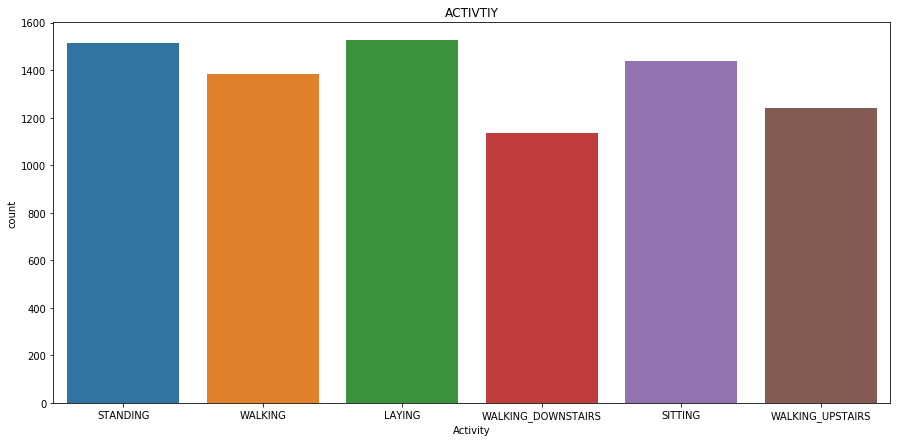

In [15]:
plt.figure(figsize = (15,7))
plt.title("ACTIVTIY")
sns.countplot(x = 'Activity', data = df_merged);

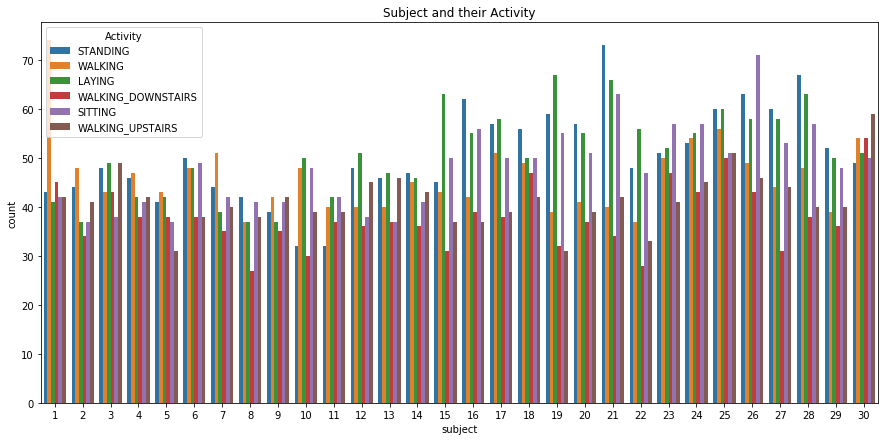

In [16]:
plt.figure(figsize = (15,7))
plt.title("Subject and their Activity")
sns.countplot(hue = 'Activity', x='subject', data = df_merged);
plt.show()

In [17]:
# the data is almost balanced and do not need to be balanced 

In [18]:
# label encoding the activity columns to convert it to numerical types would be done after eda 
# so that we can use it in the model building

In [19]:
# here data processing except encoding ends and we head for eda

# EXPLORATORY DATA ANALYSIS (EDA)

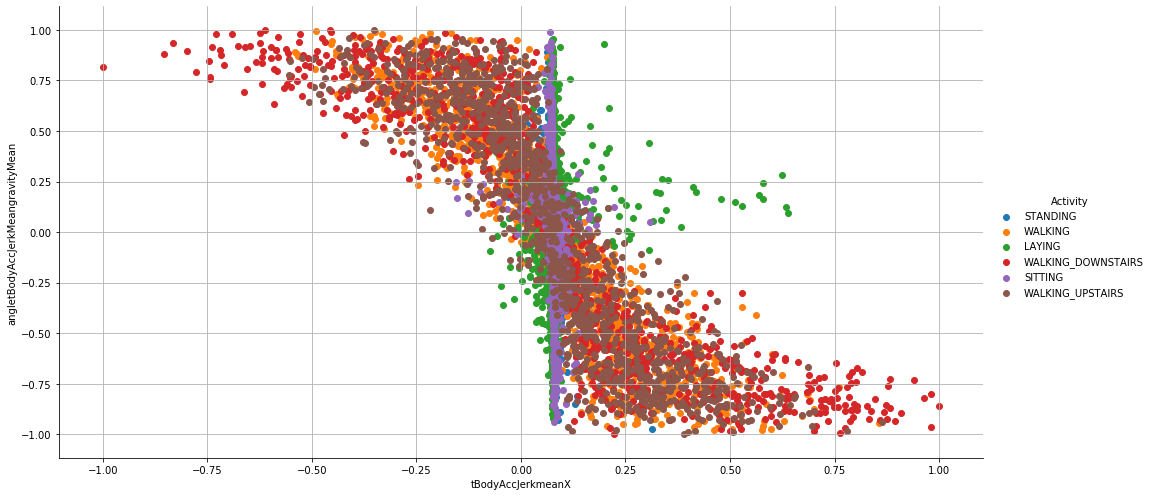

In [20]:
sns.FacetGrid(df_merged, hue='Activity', size=7, aspect=2).map(plt.scatter,'tBodyAccJerkmeanX','angletBodyAccJerkMeangravityMean').add_legend()
plt.grid()
plt.show()

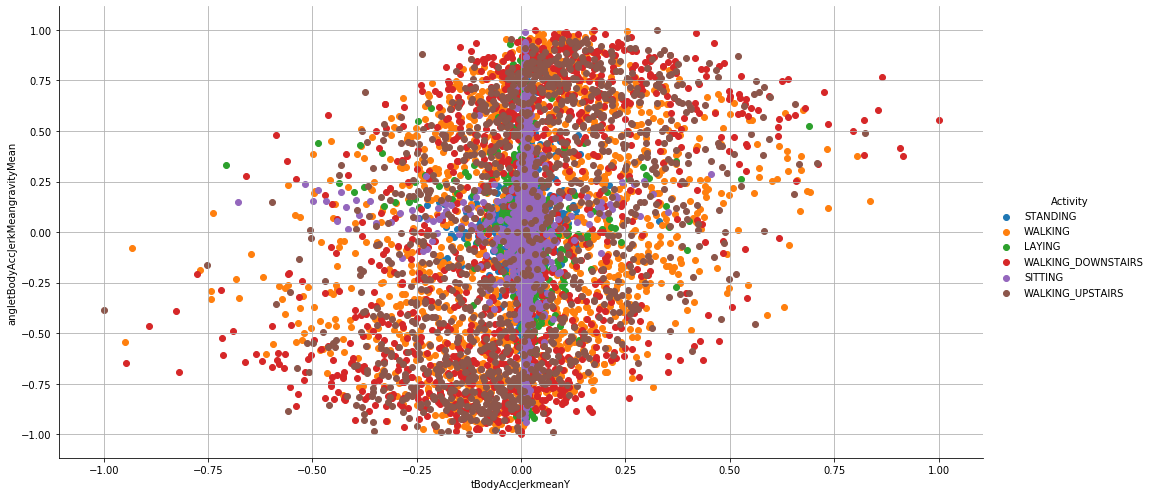

In [21]:
sns.FacetGrid(df_merged, hue='Activity', size=7, aspect=2).map(plt.scatter,'tBodyAccJerkmeanY','angletBodyAccJerkMeangravityMean').add_legend()
plt.grid()
plt.show()

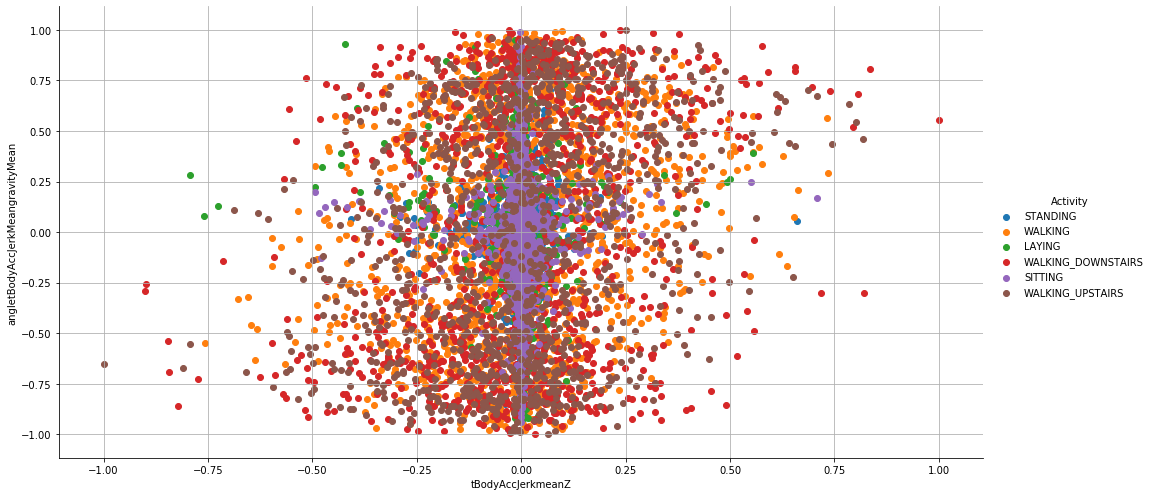

In [22]:
sns.FacetGrid(df_merged, hue='Activity', size=7, aspect=2).map(plt.scatter,'tBodyAccJerkmeanZ','angletBodyAccJerkMeangravityMean').add_legend()
plt.grid()
plt.show()

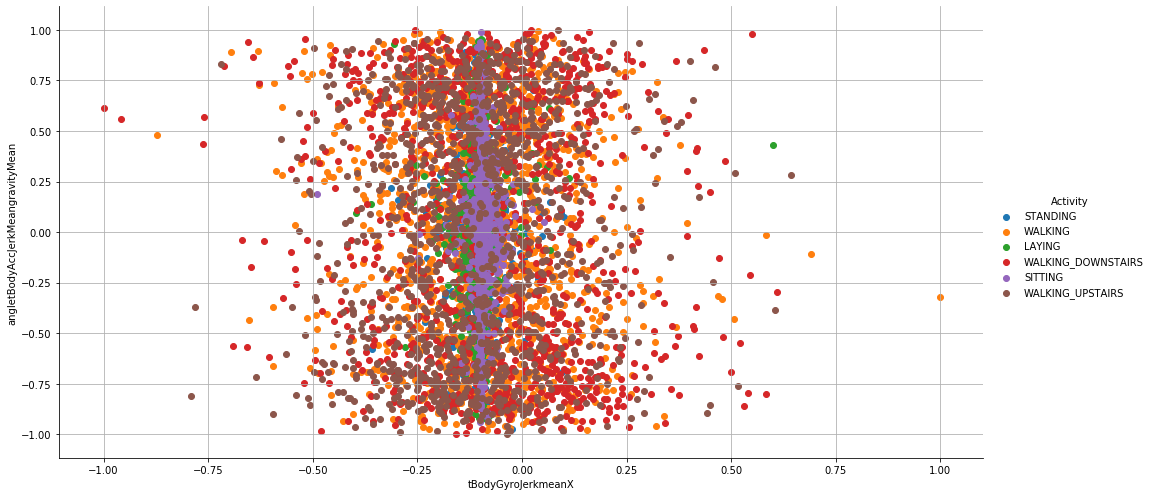

In [23]:
sns.FacetGrid(df_merged, hue='Activity', size=7, aspect=2).map(plt.scatter,'tBodyGyroJerkmeanX','angletBodyAccJerkMeangravityMean').add_legend()
plt.grid()
plt.show()

In [24]:
#the above four features can't be used because they are not able to separate any class

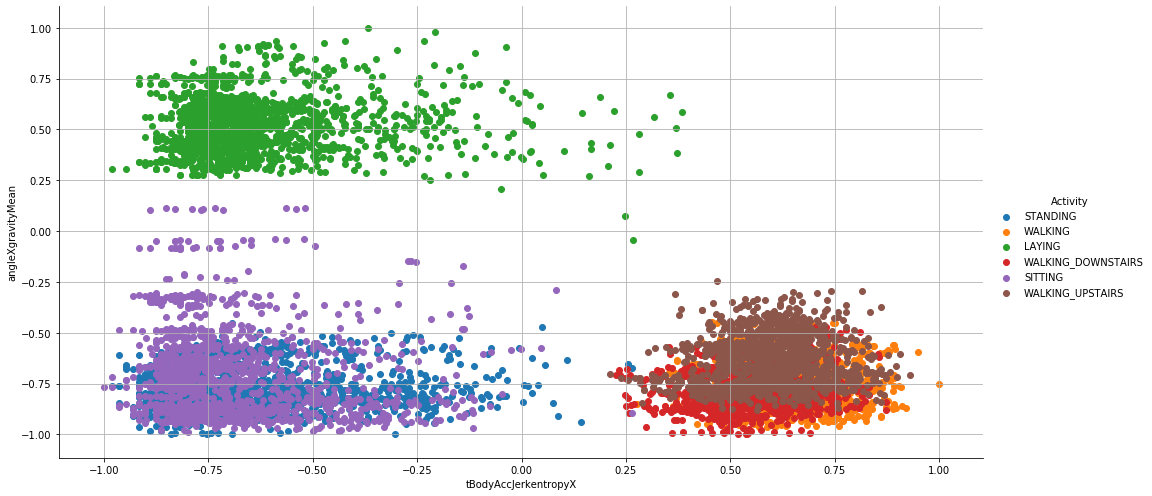

In [25]:
sns.FacetGrid(df_merged, hue='Activity', size=7, aspect=2).map(plt.scatter,'tBodyAccJerkentropyX', 'angleXgravityMean').add_legend()
plt.grid()
plt.show()

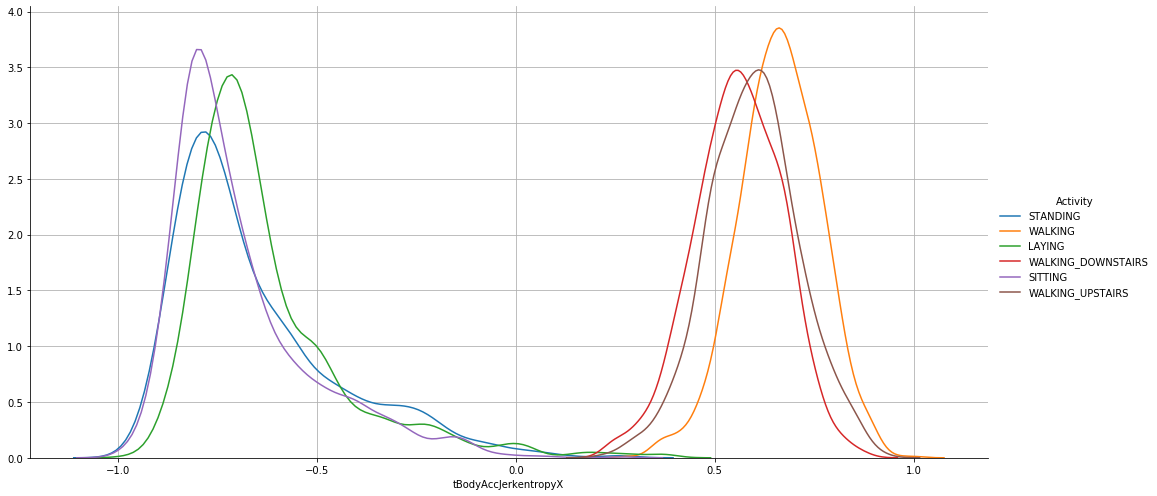

In [26]:
sns.FacetGrid(df_merged, hue='Activity', size=7, aspect=2).map(sns.distplot,'tBodyAccJerkentropyX',hist=False).add_legend()
plt.grid()
plt.show()

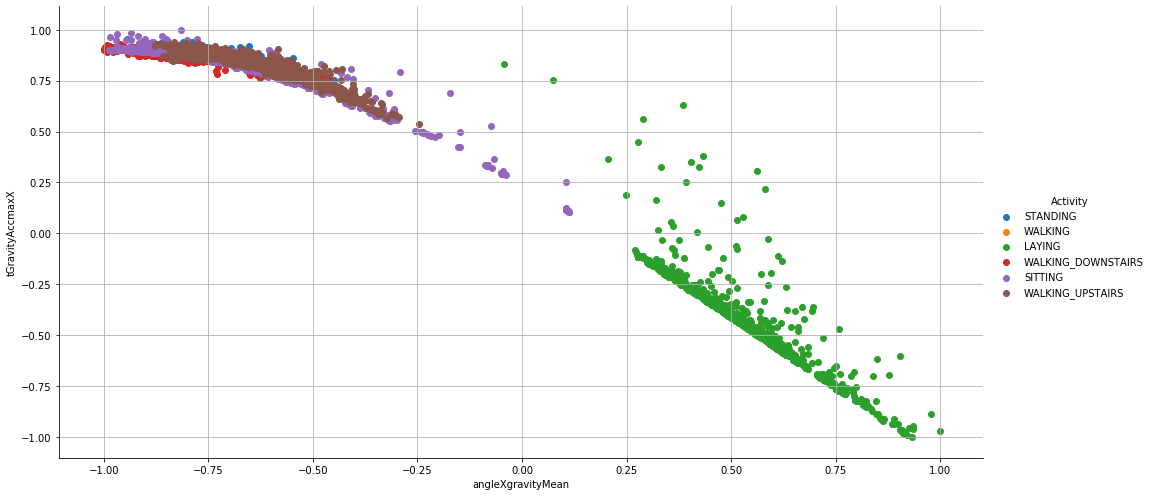

In [27]:
sns.FacetGrid(df_merged, hue='Activity', size=7, aspect=2).map(plt.scatter,'angleXgravityMean', 'tGravityAccmaxX').add_legend()
plt.grid()
plt.show()

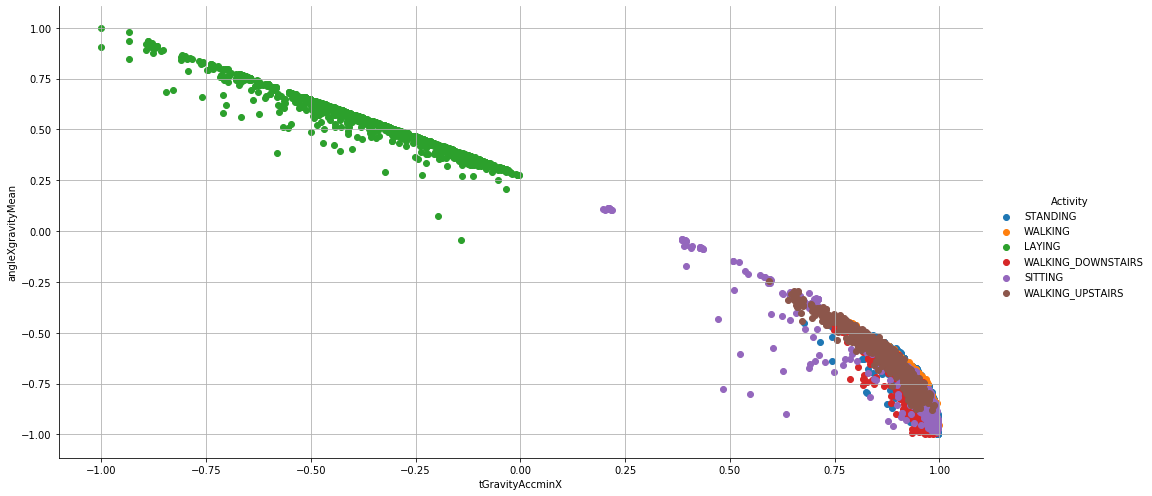

In [28]:
sns.FacetGrid(df_merged, hue='Activity', size=7, aspect=2).map(plt.scatter,'tGravityAccminX', 'angleXgravityMean').add_legend()
plt.grid()
plt.show()

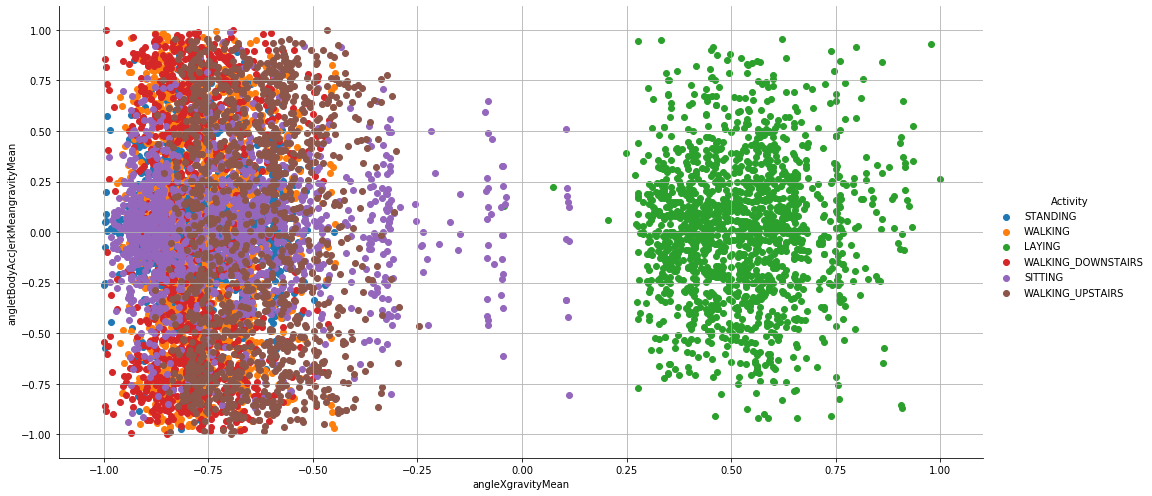

In [29]:
sns.FacetGrid(df_merged, hue='Activity', size=7, aspect=2).map(plt.scatter,'angleXgravityMean',"angletBodyAccJerkMeangravityMean").add_legend()
plt.grid()
plt.show()

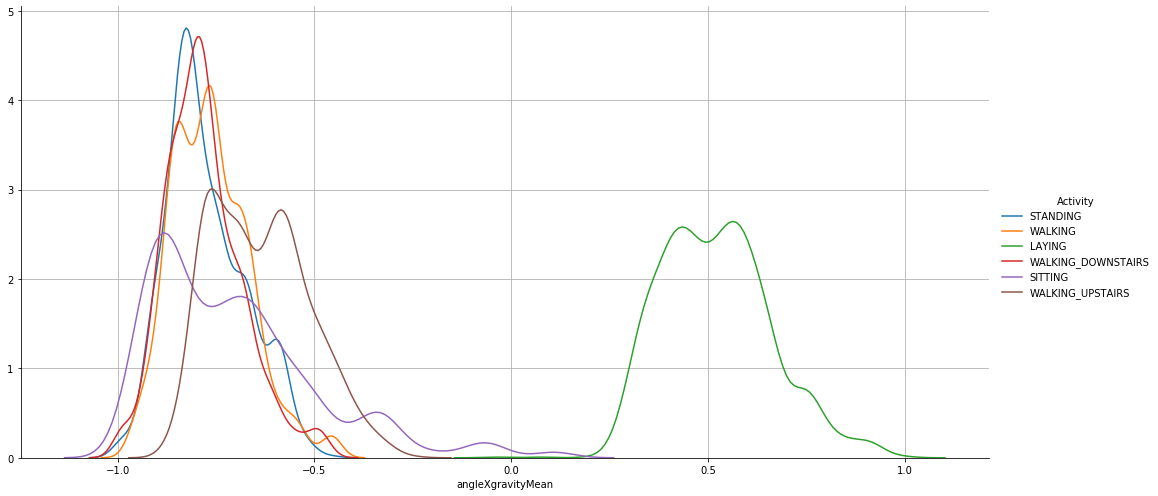

In [30]:
sns.FacetGrid(df_merged, hue='Activity', size=7, aspect=2).map(sns.distplot,'angleXgravityMean',hist=False).add_legend()
plt.grid()
plt.show()

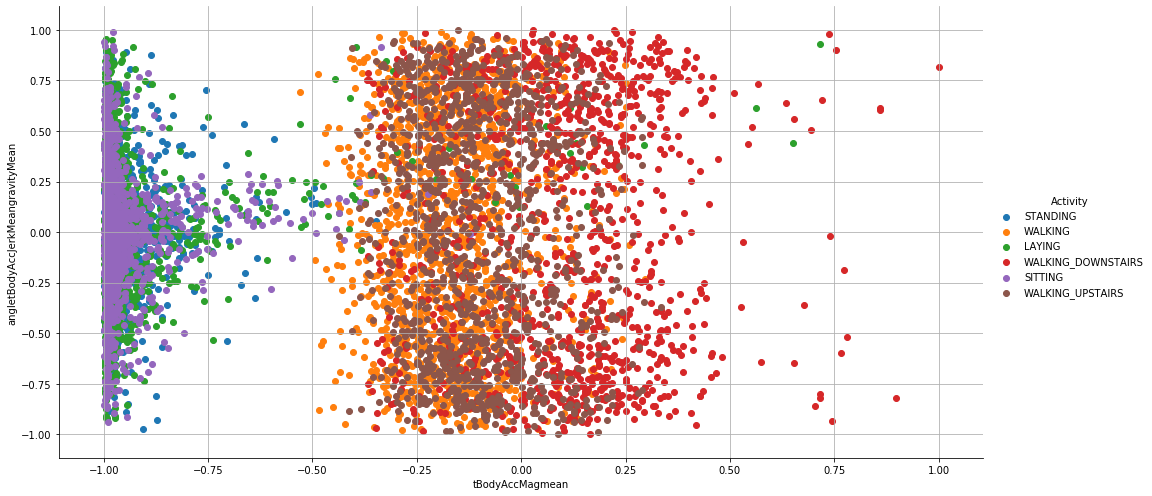

In [31]:
sns.FacetGrid(df_merged, hue='Activity', size=7, aspect=2).map(plt.scatter,'tBodyAccMagmean',"angletBodyAccJerkMeangravityMean").add_legend()
plt.grid()
plt.show()

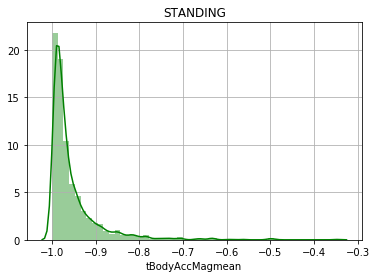

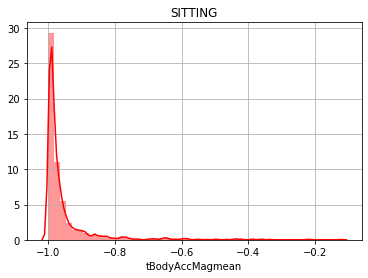

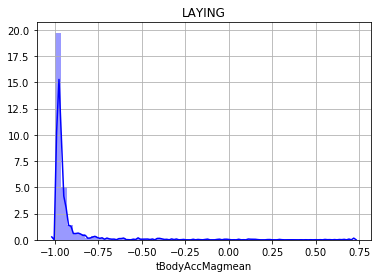

In [32]:
# all static activities
sns.distplot(df_merged[df_merged["Activity"]=="STANDING"]['tBodyAccMagmean'],color="green")
plt.title("STANDING")
plt.grid()
plt.show()
sns.distplot(df_merged[df_merged["Activity"]=="SITTING"]['tBodyAccMagmean'],color="red")
plt.title("SITTING")
plt.grid()
plt.show()
sns.distplot(df_merged[df_merged["Activity"]=="LAYING"]['tBodyAccMagmean'],color="blue")
plt.title("LAYING")
plt.grid()
plt.show()

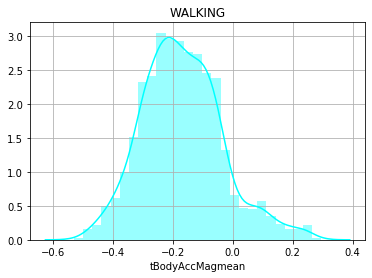

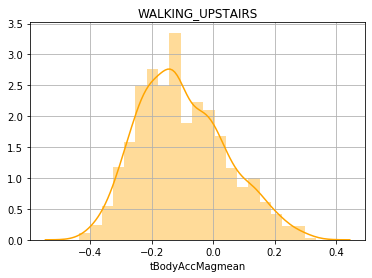

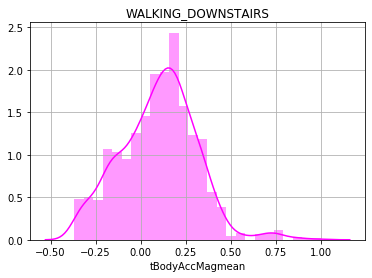

In [33]:
# all dynamic activities
sns.distplot(df_merged[df_merged["Activity"]=="WALKING"]['tBodyAccMagmean'],color="cyan")
plt.title("WALKING")
plt.grid()
plt.show()
sns.distplot(df_merged[df_merged["Activity"]=="WALKING_UPSTAIRS"]['tBodyAccMagmean'],color="orange")
plt.title("WALKING_UPSTAIRS")
plt.grid()
plt.show()
sns.distplot(df_merged[df_merged["Activity"]=="WALKING_DOWNSTAIRS"]['tBodyAccMagmean'],color="magenta")
plt.title("WALKING_DOWNSTAIRS")
plt.grid()
plt.show()

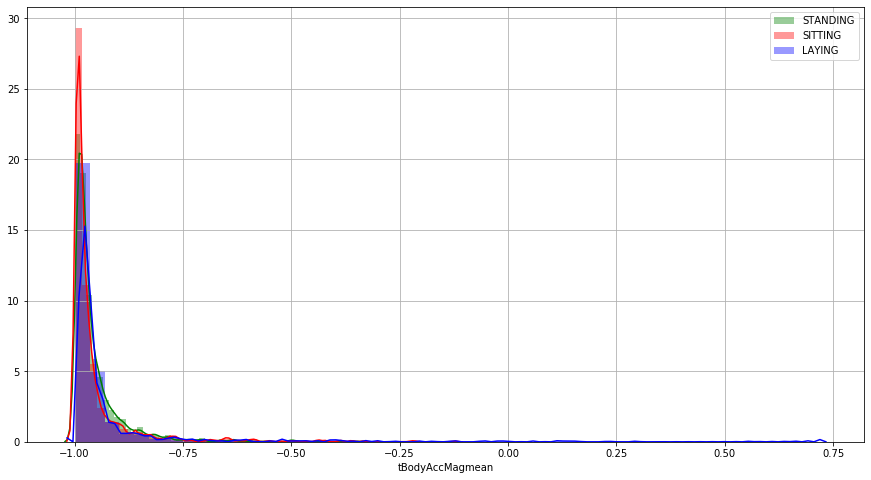

In [34]:
plt.figure(figsize=(15,8))
sns.distplot(df_merged[df_merged["Activity"]=="STANDING"]['tBodyAccMagmean'],color="green",label="STANDING")
sns.distplot(df_merged[df_merged["Activity"]=="SITTING"]['tBodyAccMagmean'],color="red",label="SITTING")
sns.distplot(df_merged[df_merged["Activity"]=="LAYING"]['tBodyAccMagmean'],color="blue",label="LAYING")
plt.grid()
plt.legend()
plt.show()

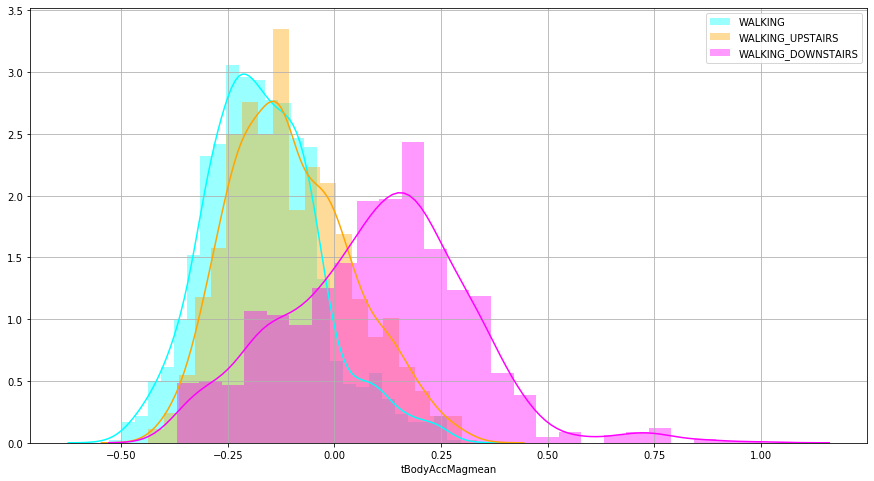

In [35]:
plt.figure(figsize=(15,8))
sns.distplot(df_merged[df_merged["Activity"]=="WALKING"]['tBodyAccMagmean'],color="cyan",label="WALKING")
sns.distplot(df_merged[df_merged["Activity"]=="WALKING_UPSTAIRS"]['tBodyAccMagmean'],color="orange",label="WALKING_UPSTAIRS")
sns.distplot(df_merged[df_merged["Activity"]=="WALKING_DOWNSTAIRS"]['tBodyAccMagmean'],color="magenta",label="WALKING_DOWNSTAIRS")
plt.grid()
plt.legend()
plt.show()

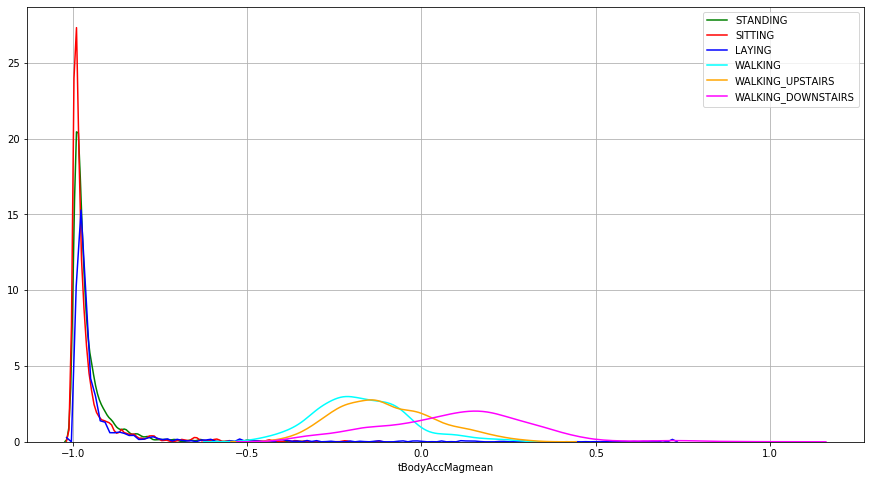

In [36]:
plt.figure(figsize=(15,8))
sns.distplot(df_merged[df_merged["Activity"]=="STANDING"]['tBodyAccMagmean'],hist=False,color="green",label="STANDING")
sns.distplot(df_merged[df_merged["Activity"]=="SITTING"]['tBodyAccMagmean'],hist=False,color="red",label="SITTING")
sns.distplot(df_merged[df_merged["Activity"]=="LAYING"]['tBodyAccMagmean'],hist=False,color="blue",label="LAYING")
sns.distplot(df_merged[df_merged["Activity"]=="WALKING"]['tBodyAccMagmean'],hist=False,color="cyan",label="WALKING")
sns.distplot(df_merged[df_merged["Activity"]=="WALKING_UPSTAIRS"]['tBodyAccMagmean'],hist=False,color="orange",label="WALKING_UPSTAIRS")
sns.distplot(df_merged[df_merged["Activity"]=="WALKING_DOWNSTAIRS"]['tBodyAccMagmean'],hist=False,color="magenta",label="WALKING_DOWNSTAIRS")
plt.grid()
plt.legend()
plt.show()

In [37]:
# we observe for all static activities the graph is right skewed so mean > median which can be verified
# from the describe function lets look at it 
print(np.median(np.array(df_merged[df_merged["Activity"]=="WALKING"]['tBodyAccMagmean'])))
df_merged[df_merged["Activity"]=="WALKING"]['tBodyAccMagmean'].describe()

-0.1786149


count    1382.000000
mean       -0.168424
std         0.134103
min        -0.529357
25%        -0.257911
50%        -0.178615
75%        -0.087070
max         0.295477
Name: tBodyAccMagmean, dtype: float64

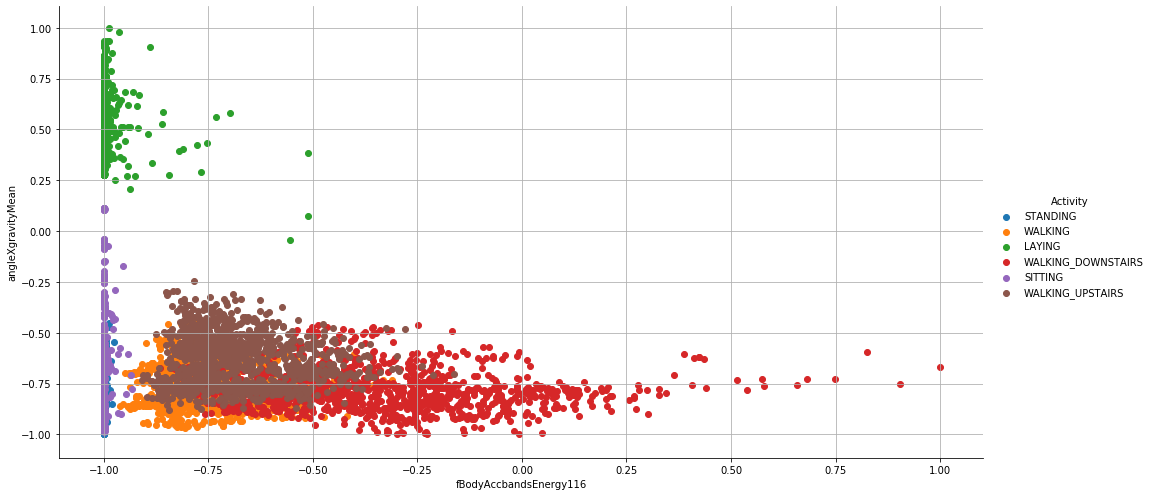

In [38]:
sns.FacetGrid(df_merged, hue='Activity', size=7, aspect=2).map(plt.scatter, 'fBodyAccbandsEnergy116','angleXgravityMean').add_legend()
plt.grid()
plt.show()

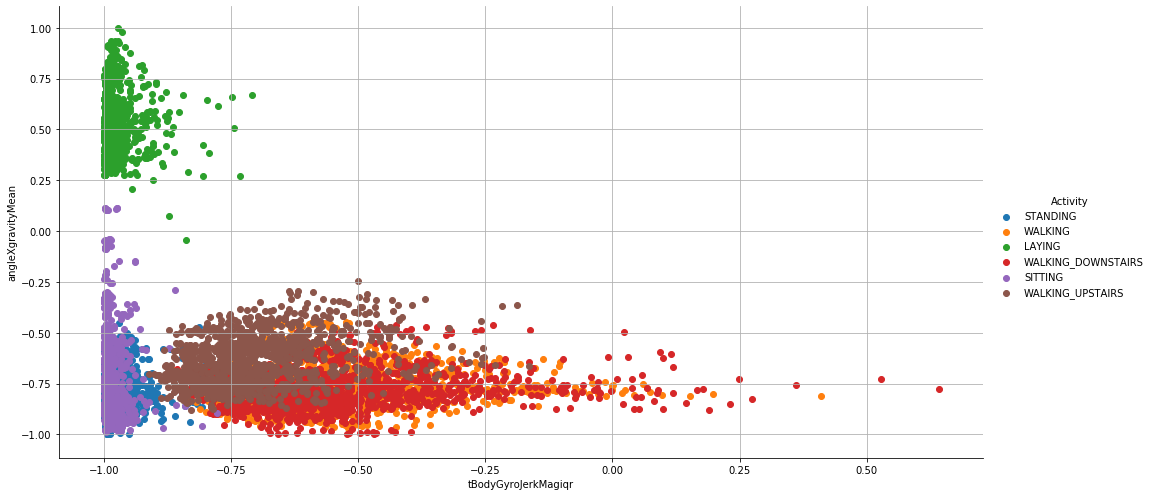

In [39]:
sns.FacetGrid(df_merged, hue='Activity', size=7, aspect=2).map(plt.scatter,'tBodyGyroJerkMagiqr', 'angleXgravityMean').add_legend()
plt.grid()
plt.show()

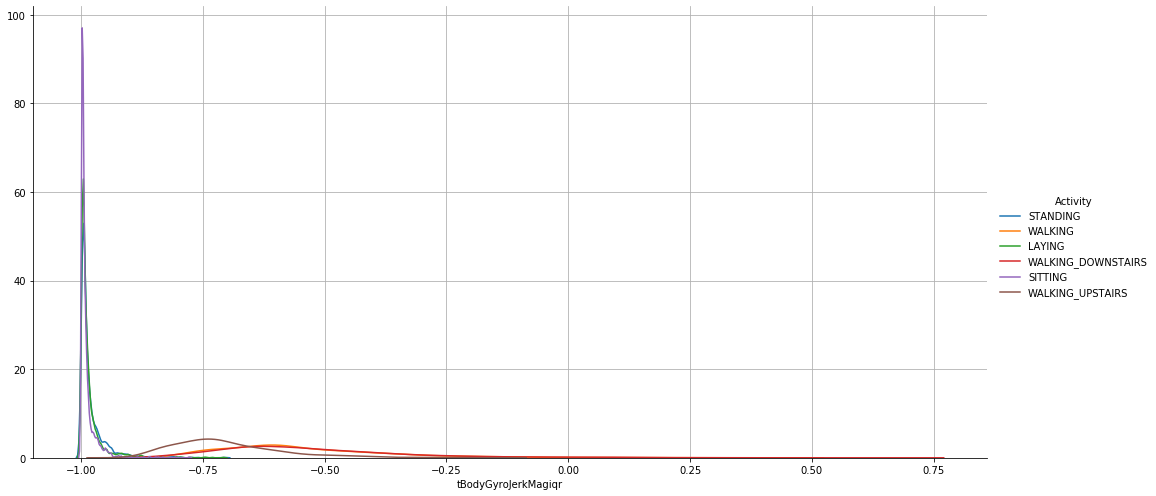

In [40]:
sns.FacetGrid(df_merged, hue='Activity', size=7, aspect=2).map(sns.distplot,'tBodyGyroJerkMagiqr',hist=False).add_legend()
plt.grid()
plt.show()

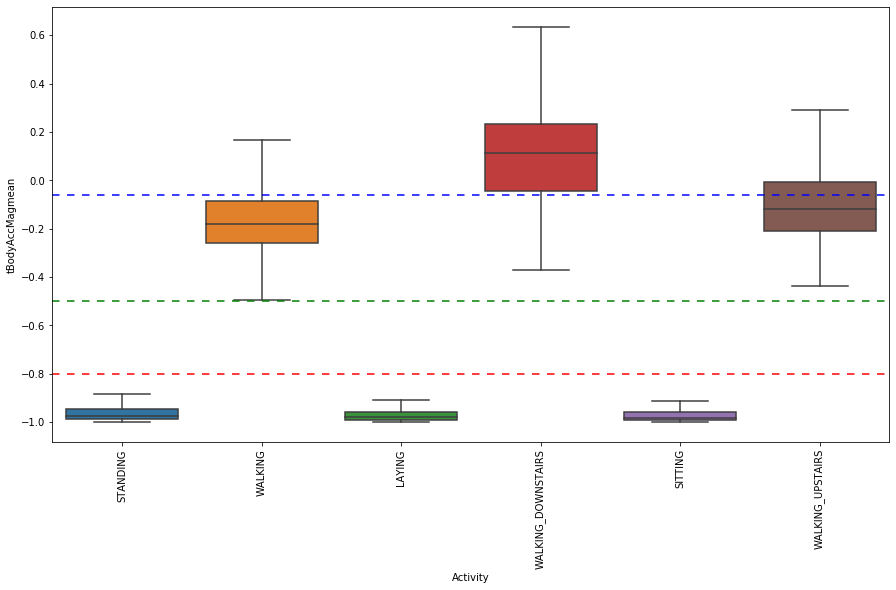

In [41]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Activity', y='tBodyAccMagmean',data=df_merged,showfliers=False)
plt.ylabel('tBodyAccMagmean')
plt.axhline(y=-0.5, dashes=(5,5), c='g')
plt.axhline(y=-0.8, dashes=(5,5), c='r')
plt.axhline(y=-0.06, dashes=(5,5), c='b')
plt.xticks(rotation=90)
plt.show()

In [42]:
# from above plot
# If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying (static activities)
# If tAccMean is > -0.5 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs (dynamic activities).
# If tAccMean > -0.05 then the Activity is almost WalkingDownstairs.

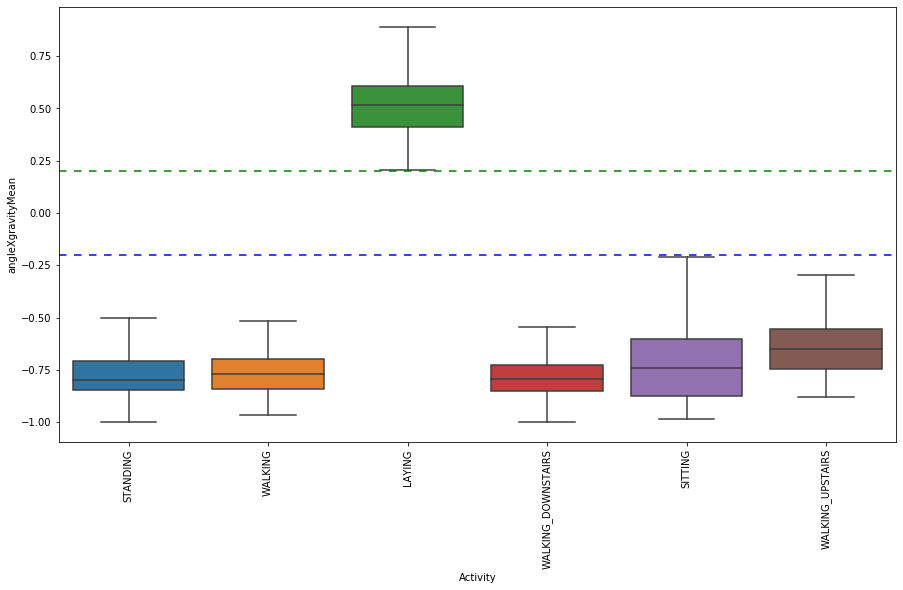

In [43]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Activity', y='angleXgravityMean',data=df_merged,showfliers=False)
plt.ylabel('angleXgravityMean')
plt.axhline(y=0.20, dashes=(5,5), c='g')
plt.axhline(y=-0.20, dashes=(5,5), c='b')
plt.xticks(rotation=90)
plt.show()

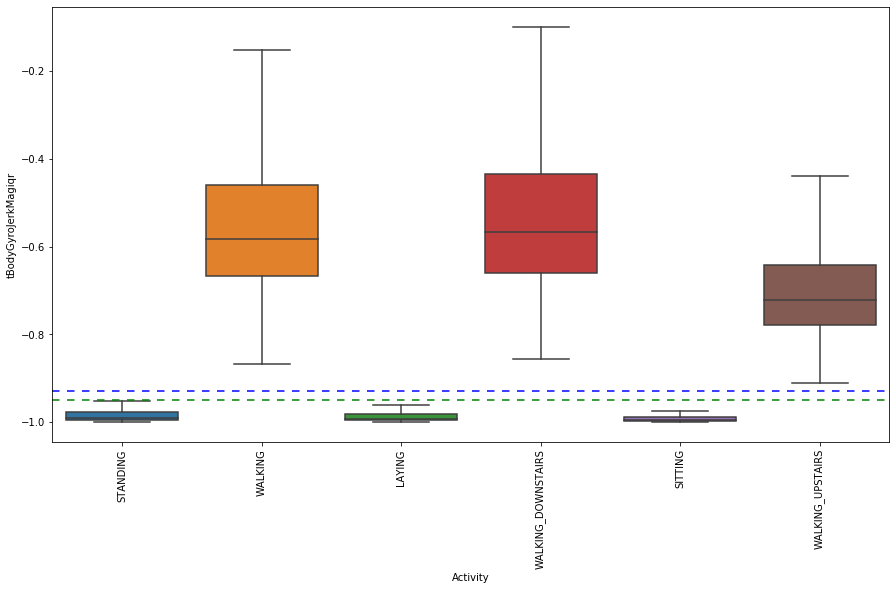

In [44]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Activity', y='tBodyGyroJerkMagiqr',data=df_merged,showfliers=False)
plt.ylabel('tBodyGyroJerkMagiqr')
plt.axhline(y=-0.95, dashes=(5,5), c='g')
plt.axhline(y=-0.93, dashes=(5,5), c='b')
plt.xticks(rotation=90)
plt.show()

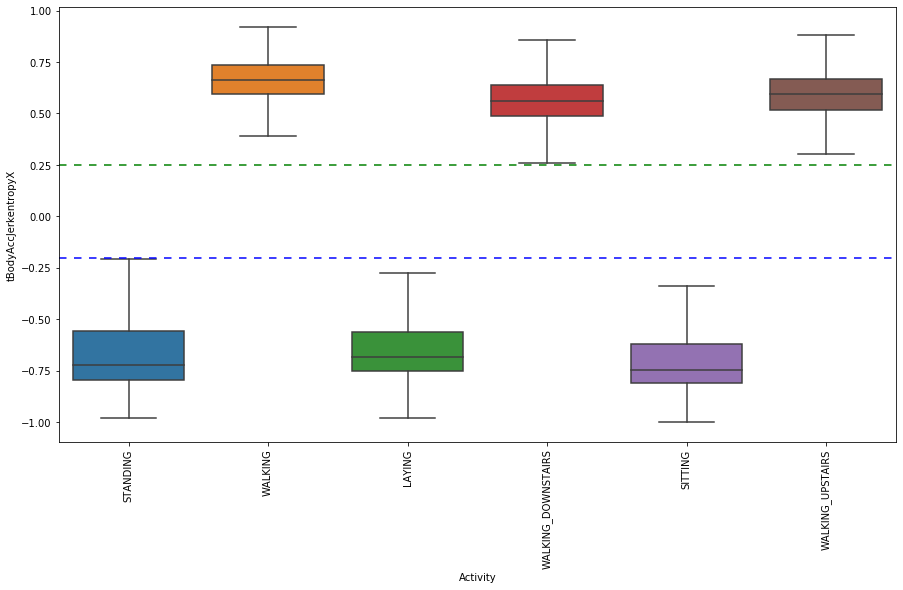

In [45]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Activity', y='tBodyAccJerkentropyX',data=df_merged,showfliers=False)
plt.ylabel('tBodyAccJerkentropyX')
plt.axhline(y=0.25, dashes=(5,5), c='g')
plt.axhline(y=-0.20, dashes=(5,5), c='b')
plt.xticks(rotation=90)
plt.show()

In [46]:
from sklearn.manifold import TSNE

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 8239 samples in 0.231s...
[t-SNE] Computed neighbors for 8239 samples in 53.032s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8239
[t-SNE] Computed conditional probabilities for sample 2000 / 8239
[t-SNE] Computed conditional probabilities for sample 3000 / 8239
[t-SNE] Computed conditional probabilities for sample 4000 / 8239
[t-SNE] Computed conditional probabilities for sample 5000 / 8239
[t-SNE] Computed conditional probabilities for sample 6000 / 8239
[t-SNE] Computed conditional probabilities for sample 7000 / 8239
[t-SNE] Computed conditional probabilities for sample 8000 / 8239
[t-SNE] Computed conditional probabilities for sample 8239 / 8239
[t-SNE] Mean sigma: 1.406584
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.928055
[t-SNE] KL divergence after 1000 iterations: 1.436810


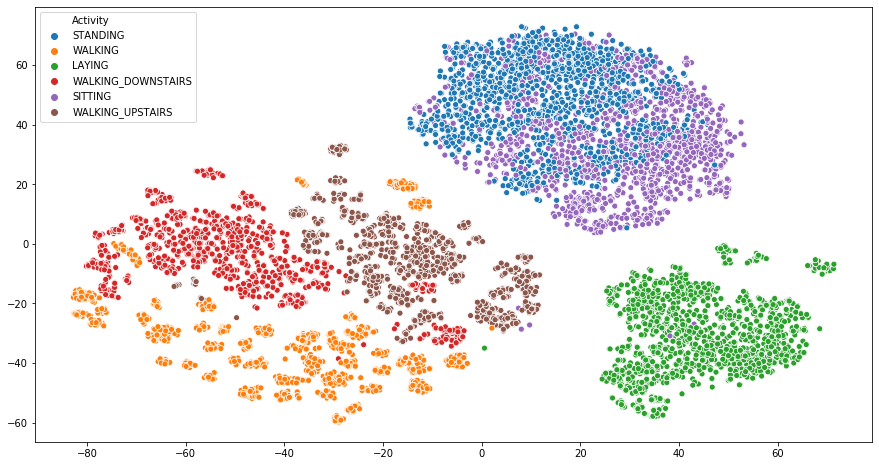

In [47]:
X_tsne= df_merged.drop(['subject', 'Activity', 'index'], axis=1)
tsne = TSNE(random_state = 42, n_components = 2, verbose = 1, perplexity = 50, n_iter = 1000).fit_transform(X_tsne)
plt.figure(figsize = (15,8))
sns.scatterplot(x = tsne[:,0], y = tsne[:,1], hue = df_merged["Activity"])

In [48]:
# from above plot ot is clear that we would have problems in classifying standing and sitting the most

# ENCODING

In [49]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df_merged['Activity']= label_encoder.fit_transform(df_merged['Activity']) 
print(df_merged['Activity'].unique())
df_merged

[2 3 0 4 1 5]


index  tBodyAccmeanX  tBodyAccmeanY  tBodyAccmeanZ  tBodyAccstdX  \
0       356       0.286433      -0.023843      -0.122738     -0.915584   
1      4482       0.333258      -0.001307      -0.166581     -0.034498   
2     10012       0.266797      -0.018683      -0.101142     -0.990874   
3      4386       0.276363      -0.020289      -0.113701     -0.995733   
4      3751       0.268231      -0.004146      -0.094503      0.473123   
...     ...            ...            ...            ...           ...   
8234   8324       0.270511      -0.011321      -0.111377     -0.988057   
8235  10206       0.260897      -0.017322      -0.103011     -0.988656   
8236   6253       0.278648      -0.020038      -0.118590     -0.983932   
8237  10123       0.283642      -0.006992      -0.129778     -0.994152   
8238   5600       0.216534      -0.020933      -0.134184     -0.319141   

      tBodyAccstdY  tBodyAccstdZ  tBodyAccmadX  tBodyAccmadY  tBodyAccmadZ  \
0        -0.710794     -0.880226     -0.932429     -0.720314     -0.881657   
1        -0.062471     -0.283268     -0.059698     -0.174912     -0.338661   
2        -0.989001     -0.987255     -0.991659     -0.987859     -0.985430   
3        -0.939094     -0.984418     -0.997013     -0.936180     -0.983728   
4         0.452403     -0.152600      0.450082      0.482764     -0.239383   
...            ...           ...           ...           ...           ...   
8234     -0.961229     -0.951407     -0.989752     -0.958753     -0.965050   
8235     -0.990926     -0.989076     -0.989816     -0.990775     -0.988472   
8236     -0.912261     -0.955945     -0.987130     -0.917041     -0.957747   
8237     -0.954562     -0.951844     -0.995321     -0.955989     -0.944934   
8238     -0.062512     -0.316390     -0.358099     -0.011323     -0.317022   

      ...  fBodyBodyGyroJerkMagkurtosis  angletBodyAccMeangravity  \
0     ...                     -0.752582                 -0.217502   
1     ...                      0.048713                 -0.191360   
2     ...                     -0.703577                 -0.152601   
3     ...                     -0.430753                  0.029986   
4     ...                     -0.558550                  0.278372   
...   ...                           ...                       ...   
8234  ...                     -0.615815                 -0.353490   
8235  ...                     -0.667159                 -0.079052   
8236  ...                      0.146016                 -0.068825   
8237  ...                     -0.881097                 -0.051389   
8238  ...                     -0.351961                  0.666435   

      angletBodyAccJerkMeangravityMean  angletBodyGyroMeangravityMean  \
0                             0.229826                       0.154791   
1                            -0.580316                      -0.423810   
2                             0.162091                      -0.628052   
3                            -0.094248                       0.025219   
4                             0.363240                       0.885432   
...                                ...                            ...   
8234                         -0.081501                       0.181517   
8235                         -0.107393                      -0.547206   
8236                         -0.060211                      -0.727493   
8237                         -0.015944                      -0.759481   
8238                          0.068822                      -0.539560   

      angletBodyGyroJerkMeangravityMean  angleXgravityMean  angleYgravityMean  \
0                             -0.431134          -0.761361           0.250580   
1                              0.689597          -0.765469           0.237371   
2                              0.551795           0.587768          -0.536508   
3                             -0.408070          -0.819227           0.213794   
4                              0.848414          -0.779760           

# From encoding we have
# 2- STANDING
# 3- WALKING
# 0- LAYING
# 4- WALKING_DOWNSTAIRS
# 1- SITTING
# 5- WALKING_UPSATIRS

In [50]:
# not correlated at all
df_merged['subject'].corr(df_merged['Activity'])

-0.038876822008530376

In [51]:
# not correlated at all
df_merged['index'].corr(df_merged['Activity'])

0.012937947689625608

In [52]:
# so drop these columns

In [53]:
X_train= df_merged.drop(['subject', 'Activity', 'index'], axis=1)
X_train

tBodyAccmeanX  tBodyAccmeanY  tBodyAccmeanZ  tBodyAccstdX  tBodyAccstdY  \
0          0.286433      -0.023843      -0.122738     -0.915584     -0.710794   
1          0.333258      -0.001307      -0.166581     -0.034498     -0.062471   
2          0.266797      -0.018683      -0.101142     -0.990874     -0.989001   
3          0.276363      -0.020289      -0.113701     -0.995733     -0.939094   
4          0.268231      -0.004146      -0.094503      0.473123      0.452403   
...             ...            ...            ...           ...           ...   
8234       0.270511      -0.011321      -0.111377     -0.988057     -0.961229   
8235       0.260897      -0.017322      -0.103011     -0.988656     -0.990926   
8236       0.278648      -0.020038      -0.118590     -0.983932     -0.912261   
8237       0.283642      -0.006992      -0.129778     -0.994152     -0.954562   
8238       0.216534      -0.020933      -0.134184     -0.319141     -0.062512   

      tBodyAccstdZ  tBodyAccmadX  tBodyAccmadY  tBodyAccmadZ  tBodyAccmaxX  \
0        -0.880226     -0.932429     -0.720314     -0.881657     -0.789914   
1        -0.283268     -0.059698     -0.174912     -0.338661      0.283234   
2        -0.987255     -0.991659     -0.987859     -0.985430     -0.936624   
3        -0.984418     -0.997013     -0.936180     -0.983728     -0.938433   
4        -0.152600      0.450082      0.482764     -0.239383      0.539911   
...            ...           ...           ...           ...           ...   
8234     -0.951407     -0.989752     -0.958753     -0.965050     -0.934746   
8235     -0.989076     -0.989816     -0.990775     -0.988472     -0.932550   
8236     -0.955945     -0.987130     -0.917041     -0.957747     -0.921052   
8237     -0.951844     -0.995321     -0.955989     -0.944934     -0.934076   
8238     -0.316390     -0.358099     -0.011323     -0.317022     -0.311890   

      ...  fBodyBodyGyroJerkMagmeanFreq  fBodyBodyGyroJerkMagskewness  \
0     ...                     -0.313588                     -0.357772   
1     ...                      0.331286                      0.308324   
2     ...                      0.253936                     -0.388442   
3     ...                     -0.544921                      0.054212   
4     ...                      0.053459                     -0.139639   
...   ...                           ...                           ...   
8234  ...                      0.182272                     -0.250141   
8235  ...                      0.087967                     -0.255976   
8236  ...                     -0.038467                      0.354233   
8237  ...                      0.396504                     -0.586855   
8238  ...                      0.295812                      0.060853   

      fBodyBodyGyroJerkMagkurtosis  angletBodyAccMeangravity  \
0                        -0.752582                 -0.217502   
1                         0.048713                 -0.191360   
2                        -0.703577                 -0.152601   
3                        -0.430753                  0.029986   
4                        -0.558550                  0.278372   
...                            ...                       ...   
8234                     -0.615815                 -0.353490   
8235                     -0.667159                 -0.079052   
8236                      0.146016                 -0.068825   
8237                     -0.881097                 -0.051389   
8238                     -0.351961                  0.666435   

      angletBodyAccJerkMeangravityMean  angletBodyGyroMeangravityMean  \
0                             0.229826                       0.154791   
1                            -0.580316                      -0.423810   
2                             0.162091                      -0.628052   
3                            -0.094248                       0.025219   
4                             0.363240                       0.885432   
...         

In [54]:
y_train= df_merged['Activity']
y_train

0       2
1       3
2       0
3       2
4       4
       ..
8234    0
8235    0
8236    2
8237    2
8238    3
Name: Activity, Length: 8239, dtype: int32

In [55]:
X_test= df_test.drop(['subject', 'index'], axis=1)
X_test

tBodyAccmeanX  tBodyAccmeanY  tBodyAccmeanZ  tBodyAccstdX  tBodyAccstdY  \
0          0.238337      -0.039950      -0.158257      0.283615      0.226575   
1          0.125920      -0.027658      -0.050069      0.082014      0.109970   
2          0.281630      -0.012995      -0.082664     -0.993584     -0.924414   
3          0.276540      -0.014060      -0.101588     -0.996289     -0.971684   
4          0.286017      -0.017170      -0.122960     -0.997019     -0.972621   
...             ...            ...            ...           ...           ...   
2055       0.316493      -0.042248      -0.112641     -0.417599     -0.062485   
2056       0.291166      -0.018297      -0.105985     -0.974934     -0.977835   
2057       0.288863      -0.021427      -0.101431     -0.990721     -0.993126   
2058       0.312810      -0.048199      -0.098430     -0.298805     -0.253997   
2059       0.310453      -0.005621      -0.116935     -0.439045     -0.092861   

      tBodyAccstdZ  tBodyAccmadX  tBodyAccmadY  tBodyAccmadZ  tBodyAccmaxX  \
0        -0.133216      0.244607      0.213950     -0.168971      0.623434   
1        -0.199439     -0.019578      0.006470     -0.207727      0.595736   
2        -0.916643     -0.994897     -0.919702     -0.910742     -0.935388   
3        -0.985675     -0.996893     -0.969509     -0.987522     -0.940376   
4        -0.994163     -0.997444     -0.974594     -0.993933     -0.940728   
...            ...           ...           ...           ...           ...   
2055     -0.456616     -0.442407     -0.105692     -0.451302     -0.310365   
2056     -0.992603     -0.975536     -0.976748     -0.993596     -0.908543   
2057     -0.990502     -0.991438     -0.992836     -0.989968     -0.925886   
2058     -0.274390     -0.364728     -0.236399     -0.305623      0.062419   
2059     -0.498774     -0.467585     -0.093235     -0.514832     -0.201652   

      ...  fBodyBodyGyroJerkMagmeanFreq  fBodyBodyGyroJerkMagskewness  \
0     ...                      0.302150                     -0.189878   
1     ...                     -0.210348                     -0.204344   
2     ...                      0.127491                     -0.385800   
3     ...                     -0.458054                     -0.256690   
4     ...                      0.282259                     -0.628981   
...   ...                           ...                           ...   
2055  ...                      0.126284                     -0.332931   
2056  ...                      0.172421                     -0.110587   
2057  ...                      0.533926                     -0.794075   
2058  ...                      0.460652                     -0.239798   
2059  ...                      0.078385                     -0.213342   

      fBodyBodyGyroJerkMagkurtosis  angletBodyAccMeangravity  \
0                        -0.585136                  0.095017   
1                        -0.648088                  0.488927   
2                        -0.751006                 -0.005078   
3                        -0.716679                  0.029915   
4                        -0.854965                  0.006138   
...                            ...                       ...   
2055                     -0.746567                 -0.528114   
2056                     -0.366192                 -0.018632   
2057                     -0.941084                  0.049695   
2058                     -0.543402                 -0.369172   
2059                     -0.505622                 -0.348489   

      angletBodyAccJerkMeangravityMean  angletBodyGyroMeangravityMean  \
0                            -0.683623                       0.936870   
1                            -0.440765                       0.138569   
2                             0.076865                      -0.094954   
3                             0.132456                       0.599696   
4                            -0.110332                       0.244955   
...         

In [56]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import f_classif, f_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [57]:
# no constants found to be removed
constant_filter= VarianceThreshold(threshold=0.01)
constant_filter.fit(X_train)
X_train_filter= constant_filter.transform(X_train)
X_train.shape

(8239, 561)

# FEATURE SELECTION

In [58]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

In [59]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [60]:
# raw model framework
def raw_framework(model, X, y):
    
    #pass in the whole dataframe into X i.e. X_train
    
    # to store results at various phases
    raw_results = dict()
    
    #assigning grid search attributes on the basis of models
    if(model==knn):
        grid_params = {'n_neighbors': [3,5,7,9]}
    elif(model==lr):
        grid_params = {'C':[0.1, 1, 10]}
    elif(model==dt):
        grid_params = {'max_depth':np.arange(3,10,2)}
    elif(model==rf):
        grid_params = {'n_estimators': np.arange(10,101,20), 'max_depth':np.arange(3,10,2)}
    elif(model==linsvm):
        grid_params = {'C':[0.5, 1, 2, 4]}
    elif(model==ksvm):
        grid_params = {'C':[2, 4, 8]}
    
    #building the models by passing the grid search attributes
    model = GridSearchCV(model, grid_params, verbose = 1, cv=5, n_jobs = -1)
    
    #fitting the model
    model.fit(X,y)
    
    # to predict y labels
    y_pred = model.predict(X)   

    # calculate overall accuracy of the model
    accuracy = metrics.accuracy_score(y_true=y, y_pred=y_pred)
    
    # store accuracy in results
    raw_results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy     |')
    print('---------------------')
    print('\n\t{}\n\n'.format(accuracy))
    
    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y, y_pred)
    raw_results['classification_report'] = classification_report
    print(classification_report)
    
    # get f1 score
    print('----------------------------')
    print('| macro averaged f1 score |')
    print('----------------------------')
    f1_sc= f1_score(y, y_pred, average='macro')
    raw_results['f1_score']= f1_sc
    print("\n\t{}\n\n".format(f1_sc))
    
    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score      |')
    print('--------------------------')
    raw_results['Average Cross Validate scores of best estimator']= model.best_score_
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

    
    # add the trained  model to the results
    raw_results['model'] = model
    
    return raw_results

# FRAMEWORK FOR FEATURE SELECTION

In [61]:
# fraework for feature selection
def fs_framework(model, X, y):
    
    #pass in the reduced dataframe into X
    
    # to store results at various phases
    fs_results = dict()
    
    #assigning grid search attributes on the basis of models
    if(model==knn):
        grid_params = {'n_neighbors': [3,5,7,9]}
    elif(model==lr):
        grid_params = {'C':[0.1, 1, 10]}
    elif(model==dt):
        grid_params = {'max_depth':np.arange(3,10,2)}
    elif(model==rf):
        grid_params = {'n_estimators': np.arange(10,101,20), 'max_depth':np.arange(3,10,2)}
    elif(model==linsvm):
        grid_params = {'C':[0.5, 1, 2, 4]}
    elif(model==ksvm):
        grid_params = {'C':[2, 4, 8]}
    
    #building the models by passing the grid search attributes
    model = GridSearchCV(model, grid_params, verbose = 1, cv=5, n_jobs = -1)
    
    #fitting the model
    model.fit(X,y)
    
    # to predict y labels
    y_pred = model.predict(X)   

    # calculate overall accuracy of the model
    accuracy = metrics.accuracy_score(y_true=y, y_pred=y_pred)
    
    # store accuracy in results
    fs_results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy     |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y, y_pred)
    fs_results['classification_report'] = classification_report
    print(classification_report)
    
    # get f1 score
    print('----------------------------')
    print('| macro averaged f1 score |')
    print('----------------------------')
    f1_sc= f1_score(y, y_pred, average='macro')
    fs_results['f1_score']= f1_sc
    print("\n\t{}\n\n".format(f1_sc))
    
    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score      |')
    print('--------------------------')
    fs_results['Average Cross Validate scores of best estimator']= model.best_score_
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

    # add the trained  model to the results
    fs_results['model'] = model
    
    return fs_results

# RAW MODEL WITHOUT FEATURE SELECTION

# Model checking on whole dataset without feature selection

In [62]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# KNN

In [63]:
knn = KNeighborsClassifier()
raw_knn_gs_results=  raw_framework(knn,X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   46.1s finished


---------------------
|      Accuracy     |
---------------------

	0.9877412307318849


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1525
           1       0.97      0.97      0.97      1440
           2       0.97      0.97      0.97      1514
           3       1.00      1.00      1.00      1382
           4       1.00      1.00      1.00      1137
           5       1.00      1.00      1.00      1241

    accuracy                           0.99      8239
   macro avg       0.99      0.99      0.99      8239
weighted avg       0.99      0.99      0.99      8239

----------------------------
| macro averaged f1 score |
----------------------------

	0.9884510562648269


--------------------------
|        Best Score      |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9623740745236072



# LOGISTIC REGRESSION

In [64]:
lr= linear_model.LogisticRegression()
raw_lr_gs_results=  raw_framework(lr,X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   42.6s finished


---------------------
|      Accuracy     |
---------------------

	0.9938099283893677


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1525
           1       0.98      0.98      0.98      1440
           2       0.98      0.98      0.98      1514
           3       1.00      1.00      1.00      1382
           4       1.00      1.00      1.00      1137
           5       1.00      1.00      1.00      1241

    accuracy                           0.99      8239
   macro avg       0.99      0.99      0.99      8239
weighted avg       0.99      0.99      0.99      8239

----------------------------
| macro averaged f1 score |
----------------------------

	0.9942413792984821


--------------------------
|        Best Score      |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9868916130598374



# DECISION TREES

In [65]:
dt = DecisionTreeClassifier()
raw_dt_gs_results = raw_framework(dt,X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    6.9s finished


---------------------
|      Accuracy     |
---------------------

	0.976817574948416


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1525
           1       0.98      0.97      0.97      1440
           2       0.97      0.98      0.98      1514
           3       0.98      0.96      0.97      1382
           4       0.98      0.97      0.97      1137
           5       0.95      0.97      0.96      1241

    accuracy                           0.98      8239
   macro avg       0.98      0.98      0.98      8239
weighted avg       0.98      0.98      0.98      8239

----------------------------
| macro averaged f1 score |
----------------------------

	0.976085725991081


--------------------------
|        Best Score      |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9331229518145406



# RANDOM FOREST

In [66]:
rf= RandomForestClassifier()
raw_rf_gs_results= raw_framework(rf,X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   46.8s finished


---------------------
|      Accuracy     |
---------------------

	0.9888335963102318


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1525
           1       0.99      0.97      0.98      1440
           2       0.97      0.99      0.98      1514
           3       1.00      0.99      0.99      1382
           4       1.00      0.99      0.99      1137
           5       0.98      1.00      0.99      1241

    accuracy                           0.99      8239
   macro avg       0.99      0.99      0.99      8239
weighted avg       0.99      0.99      0.99      8239

----------------------------
| macro averaged f1 score |
----------------------------

	0.9890108970018078


--------------------------
|        Best Score      |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9678359024153417



# LINEAR SVM

In [67]:
linsvm= LinearSVC()
raw_linsvm_gs_results= raw_framework(linsvm,X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   33.9s finished


---------------------
|      Accuracy     |
---------------------

	0.9930816846704698


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1525
           1       0.98      0.98      0.98      1440
           2       0.98      0.98      0.98      1514
           3       1.00      1.00      1.00      1382
           4       1.00      1.00      1.00      1137
           5       1.00      1.00      1.00      1241

    accuracy                           0.99      8239
   macro avg       0.99      0.99      0.99      8239
weighted avg       0.99      0.99      0.99      8239

----------------------------
| macro averaged f1 score |
----------------------------

	0.9935636701368905


--------------------------
|        Best Score      |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.987377108872436



# KERNEL SVM

In [68]:
ksvm = SVC()
raw_ksvm_gs_results = raw_framework(ksvm,X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   37.3s finished


---------------------
|      Accuracy     |
---------------------

	0.9821580288870009


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1525
           1       0.95      0.95      0.95      1440
           2       0.96      0.95      0.95      1514
           3       1.00      1.00      1.00      1382
           4       1.00      1.00      1.00      1137
           5       1.00      1.00      1.00      1241

    accuracy                           0.98      8239
   macro avg       0.98      0.98      0.98      8239
weighted avg       0.98      0.98      0.98      8239

----------------------------
| macro averaged f1 score |
----------------------------

	0.9832138299590808


--------------------------
|        Best Score      |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.977545818667314



# FILTER METHODS

# ANOVA with SelectKBest

In [69]:
from sklearn.feature_selection import SelectFromModel

In [70]:
feature_rank= SelectKBest(score_func=f_classif, k=20)
ordered_features= feature_rank.fit(X_train, y_train)

In [71]:
df_scores= pd.DataFrame(ordered_features.scores_,columns=["Scores"])
df_columns= pd.DataFrame(X_train.columns)
df_anova= pd.concat([df_columns,df_scores],axis=1)
df_anova.columns=["Features","Scores"]
df_anova= df_anova.sort_values(by="Scores", ascending=False)
df_anova

Features        Scores
366              fBodyAccJerkentropyX  40205.713619
40                   tGravityAccmeanX  36543.963294
52                    tGravityAccminX  34969.897103
49                    tGravityAccmaxX  32432.283094
56                 tGravityAccenergyX  31642.471801
..                                ...           ...
162                tBodyGyroJerkmeanZ      2.088641
81                  tBodyAccJerkmeanY      1.207703
80                  tBodyAccJerkmeanX      0.797591
555  angletBodyAccJerkMeangravityMean      0.393633
82                  tBodyAccJerkmeanZ      0.118357

[561 rows x 2 columns]

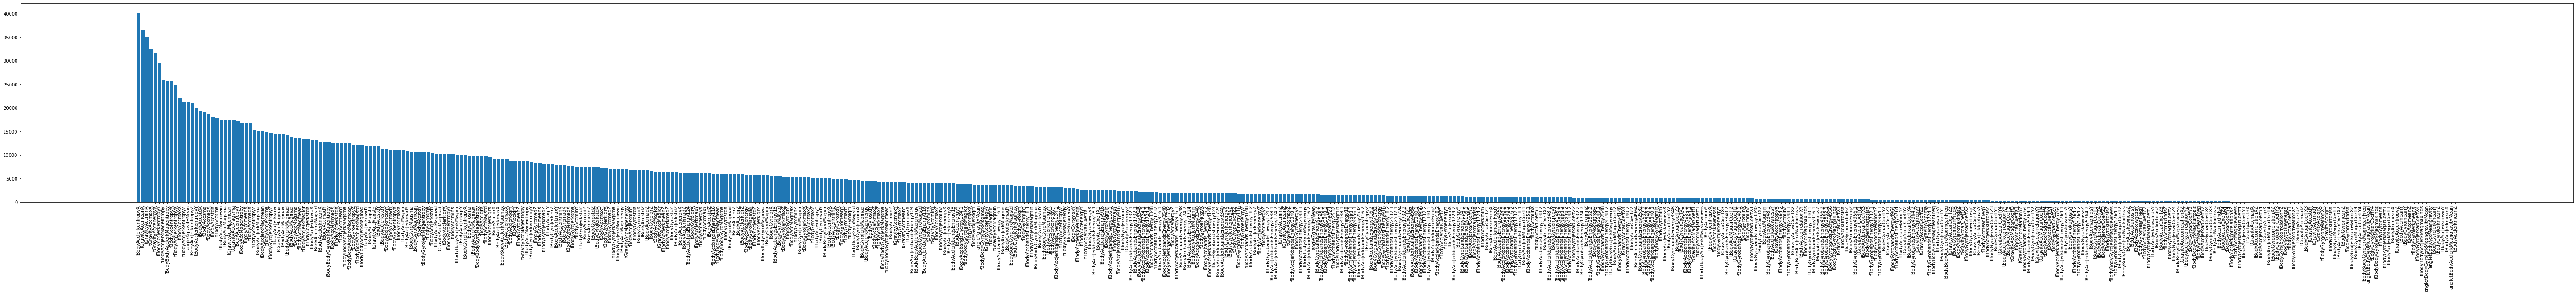

In [72]:
plt.figure(figsize=(100,8))
plt.bar(df_anova["Features"],df_anova["Scores"])
plt.xticks(rotation=90)
plt.show()

In [73]:
lst=[]
for i in df_anova.iloc[0:20]["Features"]:
    lst.append(i)
lst
df_anova_fs= X_train[lst]
df_anova_fs

fBodyAccJerkentropyX  tGravityAccmeanX  tGravityAccminX  \
0                -0.285499          0.948900         0.967209   
1                 0.683882          0.937160         0.953369   
2                -1.000000         -0.468033        -0.419533   
3                -1.000000          0.960576         0.980233   
4                 0.834727          0.921750         0.930145   
...                    ...               ...              ...   
8234             -1.000000         -0.567957        -0.517914   
8235             -1.000000         -0.253622        -0.213495   
8236             -0.902724          0.957125         0.975170   
8237             -0.943699          0.968711         0.986952   
8238              0.536687          0.955953         0.971762   

      tGravityAccmaxX  tGravityAccenergyX  fBodyAccJerkentropyY  \
0            0.876946            0.861361             -0.250593   
1            0.867357            0.830793              0.785142   
2           -0.533744           -0.999957             -1.000000   
3            0.886141            0.892015             -1.000000   
4            0.864241            0.791080              0.864622   
...               ...                 ...                   ...   
8234        -0.623367           -0.991993             -1.000000   
8235        -0.318568           -0.955101             -1.000000   
8236         0.883318            0.882929             -0.792618   
8237         0.895439            0.913526             -1.000000   
8238         0.886305            0.879857              0.495976   

      tBodyAccJerkMagentropy  fBodyBodyAccJerkMagentropy  fBodyAccentropyX  \
0                   0.043344                   -0.326094         -0.188366   
1                   0.835047                    0.546607          0.665603   
2                  -0.833587                   -1.000000         -0.946357   
3                  -0.766143                   -0.940965         -1.000000   
4                   0.917347                    0.692700          0.788154   
...                      ...                         ...               ...   
8234               -0.541958                   -0.606585         -0.873892   
8235               -0.820366                   -1.000000         -0.873892   
8236               -0.473104                   -0.898000         -0.817269   
8237               -0.733150                   -1.000000         -0.946357   
8238                0.734750                    0.289487          0.577589   

      tBodyAccJerkentropyX  tBodyAccmaxX  tBodyAccJerkentropyZ  \
0                 0.016084     -0.789914             -0.242778   
1                 0.838673      0.283234              0.770893   
2                -0.722650     -0.936624             -0.689264   
3                -0.819949     -0.938433             -0.806808   
4                 0.528507      0.539911              0.498689   
...                    ...           ...                   ...   
8234             -0.692397     -0.934746             -0.355040   
8235             -0.691933     -0.932550             -0.721095   
8236             -0.481965     -0.921052             -0.577423   
8237             -0.637558     -0.934076             -0.642193   
8238              0.701941     -0.311890              0.561771   

      angleXgravityMean  fBodyAccJerkentropyZ  tBodyAccJerkentropyY  \
0             -0.761361             -0.541747              0.018791   
1             -0.765469              0.525389              0.878168   
2              0.587768             -1.000000             -0.754968   
3             -0.819227             -1.000000             -0.648543   
4             -0.779760              0.539565              0.806056   
...                 ...                   ...                   ...   
8234           0.658690             -0.511158             -0.668087   
8235           0.435081             -1.000000             -0.767836   
8236          -0.795575             -0.900162      

# mutual information gain

In [74]:
from sklearn.feature_selection import mutual_info_classif
ig = mutual_info_classif(X_train,y_train)
ig

array([0.32742047, 0.2039356 , 0.15921176, 0.8617928 , 0.68607704,
       0.67165552, 0.84094077, 0.68200756, 0.6598091 , 0.96903858,
       0.77348846, 0.7670477 , 0.8390699 , 0.79559562, 0.77527842,
       0.75333171, 0.8665516 , 0.6819642 , 0.65236657, 0.79755203,
       0.68702144, 0.65440434, 0.66705876, 0.59168659, 0.52127965,
       0.44470431, 0.24388611, 0.09165807, 0.08850694, 0.26796887,
       0.20770871, 0.03727829, 0.01927563, 0.2626599 , 0.20899051,
       0.05390472, 0.03865477, 0.29056895, 0.13664673, 0.19101929,
       0.64149502, 0.7690007 , 0.57196907, 0.43141101, 0.3519195 ,
       0.29847219, 0.40344256, 0.35863816, 0.28259293, 0.70453464,
       0.83325651, 0.65441249, 0.78143331, 0.84851229, 0.68749771,
       0.24268028, 0.64423962, 0.54743278, 0.39396428, 0.35284354,
       0.30676083, 0.24123105, 0.23019823, 0.22543175, 0.1403438 ,
       0.29775742, 0.32577108, 0.34824379, 0.36204688, 0.25100254,
       0.25277468, 0.2435099 , 0.2264365 , 0.18872835, 0.20047

In [75]:
df1= pd.DataFrame(ig,columns=["scores"])
df2= pd.DataFrame(X_train.columns)
df3= pd.concat([df2,df1],axis=1)
df3.columns=["features","scores"]
df3= df3.sort_values(by="scores", ascending=False)
df3

features    scores
9                tBodyAccmaxX  0.969039
89           tBodyAccJerkmaxX  0.903489
310    fBodyAccbandsEnergy116  0.884739
203            tBodyAccMagmax  0.882964
216         tGravityAccMagmax  0.882893
..                        ...       ...
32          tBodyAccarCoeffY4  0.019276
188    tBodyGyroJerkarCoeffX4  0.014191
237   tBodyAccJerkMagarCoeff3  0.010624
263  tBodyGyroJerkMagarCoeff3  0.004878
192    tBodyGyroJerkarCoeffY4  0.003274

[561 rows x 2 columns]

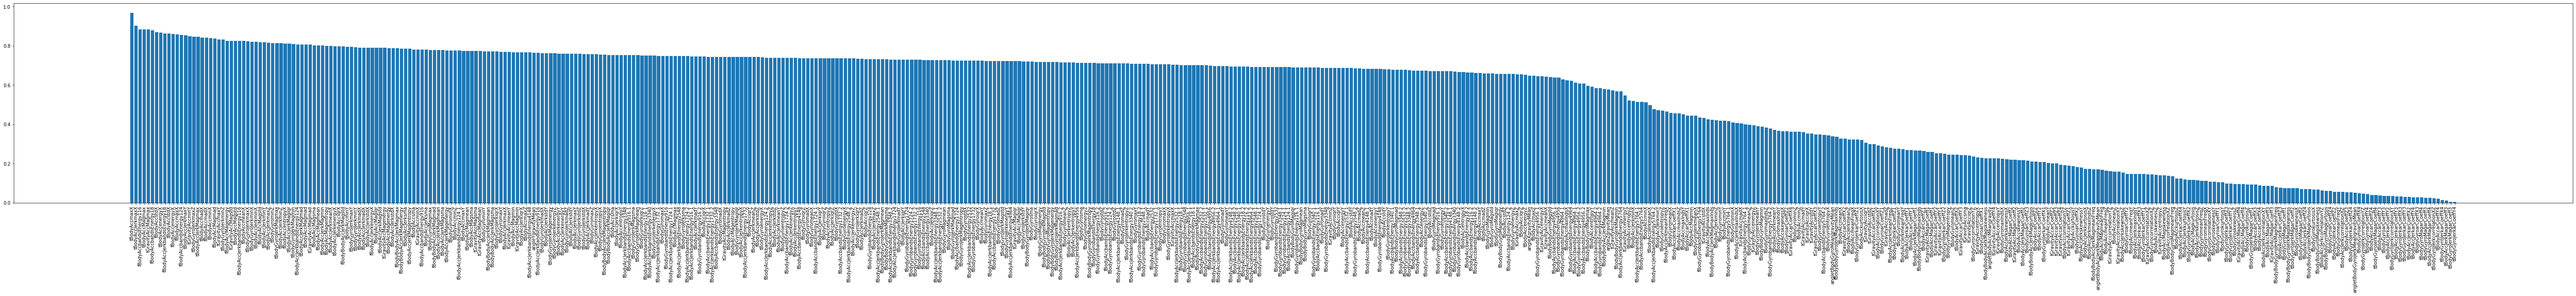

In [76]:
plt.figure(figsize=(100,8))
plt.bar(df3["features"],df3["scores"])
plt.xticks(rotation=90)
plt.show()

In [77]:
features= df3["features"][df3["scores"]>0.8]
df_ig_fs= X_train[features]
df_ig_fs

tBodyAccmaxX  tBodyAccJerkmaxX  fBodyAccbandsEnergy116  tBodyAccMagmax  \
0        -0.789914         -0.887531               -0.996784       -0.844117   
1         0.283234         -0.000537               -0.561579       -0.011789   
2        -0.936624         -0.988145               -0.999924       -0.989259   
3        -0.938433         -0.989624               -0.999974       -0.960194   
4         0.539911          0.201350                0.134448        0.348355   
...            ...               ...                     ...             ...   
8234     -0.934746         -0.974142               -0.999889       -0.937377   
8235     -0.932550         -0.991866               -0.999891       -0.985880   
8236     -0.921052         -0.978160               -0.999871       -0.953765   
8237     -0.934076         -0.987179               -0.999986       -0.967070   
8238     -0.311890         -0.556322               -0.767429       -0.285119   

      tGravityAccMagmax  fBodyAccbandsEnergy18  fBodyAccstdX  tBodyAccenergyX  \
0             -0.844117              -0.998409     -0.926160        -0.996081   
1             -0.011789              -0.529707     -0.022994        -0.532367   
2             -0.989259              -0.999923     -0.990972        -0.999896   
3             -0.960194              -0.999981     -0.996449        -0.999973   
4              0.348355               0.038665      0.549380         0.083830   
...                 ...                    ...           ...              ...   
8234          -0.937377              -0.999897     -0.988371        -0.999868   
8235          -0.985880              -0.999889     -0.988253        -0.999831   
8236          -0.953765              -0.999931     -0.986723        -0.999803   
8237          -0.967070              -0.999991     -0.995387        -0.999951   
8238          -0.285119              -0.768093     -0.325004        -0.766142   

      fBodyAccJerkbandsEnergy18  tBodyAccstdX  ...  fBodyAccentropyX  \
0                     -0.998010     -0.915584  ...         -0.188366   
1                     -0.629870     -0.034498  ...          0.665603   
2                     -0.999983     -0.990874  ...         -0.946357   
3                     -0.999991     -0.995733  ...         -1.000000   
4                     -0.119699      0.473123  ...          0.788154   
...                         ...           ...  ...               ...   
8234                  -0.999988     -0.988057  ...         -0.873892   
8235                  -0.999985     -0.988656  ...         -0.873892   
8236                  -0.999950     -0.983932  ...         -0.817269   
8237                  -0.999992     -0.994152  ...         -0.946357   
8238                  -0.849485     -0.319141  ...          0.577589   

      tBodyAccJerkMagiqr  tBodyGyroJerkMagmin  fBodyAccJerkbandsEnergy124  \
0              -0.875949            -0.911995                   -0.991124   
1              -0.187301            -0.590764                   -0.486215   
2              -0.990479            -0.986784                   -0.999915   
3              -0.992691            -0.985626                   -0.999972   
4               0.130711            -0.422310                    0.040484   
...                  ...                  ...                         ...   
8234           -0.973046            -0.990628                   -0.999850   
8235           -0.992474            -0.997351                   -0.999905   
8236           -0.965380            -0.970544                   -0.999546   
8237           -0.986881            -0.981500                   -0.999865   
8238           -0.396591            -0.788030                   -0.742889   

      tBodyAccJerkMagmad  tBodyAccMagmad  tGravityAccMagmad  fBodyAccMagsma  \
0              -0.857766       -0.854297          -0.854297       -0.829808   
1               0.039413       -0.270409          -0.270409       -0.008373   
2              -0.991999       -0.991458     

# Extra tree classifier with feature importances

In [78]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model= model.fit(X_train, y_train)
feature_importance = model.feature_importances_
feature_importance

array([2.74853559e-04, 4.89067798e-04, 2.37715378e-04, 6.70854870e-03,
       5.16922278e-04, 5.66161433e-04, 5.84674463e-03, 3.21450728e-03,
       8.18780405e-04, 9.01401851e-03, 5.00619475e-05, 2.42072862e-04,
       1.48722804e-04, 1.53241485e-04, 1.94658002e-04, 4.08048015e-04,
       2.37792530e-03, 6.79313064e-04, 4.20716319e-04, 1.25655762e-03,
       1.41982874e-03, 7.53318971e-04, 2.78859004e-03, 1.74162111e-04,
       1.96592002e-04, 6.64533284e-04, 3.84039220e-04, 3.60783221e-04,
       1.23489310e-03, 3.03019459e-04, 2.37756978e-04, 1.81438808e-04,
       5.35579071e-04, 2.41613297e-04, 4.57300715e-04, 3.87430065e-04,
       5.40015738e-04, 3.79612972e-03, 2.39595576e-03, 2.71974873e-03,
       2.55899713e-02, 1.59919087e-02, 6.22869453e-03, 1.10192044e-03,
       1.13145352e-03, 5.35258492e-04, 4.95493593e-04, 1.16178311e-03,
       9.72060656e-04, 3.57126695e-02, 3.17109607e-02, 2.54100878e-03,
       2.02711602e-02, 3.44860977e-02, 6.02400751e-03, 4.42493670e-03,
      

In [79]:
rank_df= pd.DataFrame(feature_importance,columns=["importance"])
column_df= pd.DataFrame(X_train.columns,columns=["features"])
ranked_features= pd.concat([column_df,rank_df],axis=1)
ranked_features

features  importance
0                        tBodyAccmeanX    0.000275
1                        tBodyAccmeanY    0.000489
2                        tBodyAccmeanZ    0.000238
3                         tBodyAccstdX    0.006709
4                         tBodyAccstdY    0.000517
..                                 ...         ...
556      angletBodyGyroMeangravityMean    0.003053
557  angletBodyGyroJerkMeangravityMean    0.001714
558                  angleXgravityMean    0.007442
559                  angleYgravityMean    0.008259
560                  angleZgravityMean    0.017869

[561 rows x 2 columns]

In [80]:
ordered_features= ranked_features.sort_values(ascending=False, by="importance")
ordered_features

features  importance
49               tGravityAccmaxX    0.035713
53               tGravityAccminY    0.034486
50               tGravityAccmaxY    0.031711
56            tGravityAccenergyX    0.027028
40              tGravityAccmeanX    0.025590
..                           ...         ...
388  fBodyAccJerkbandsEnergy5764    0.000091
323    fBodyAccbandsEnergy5764.1    0.000083
484   fBodyGyrobandsEnergy3348.1    0.000082
277                 fBodyAccminX    0.000052
10                  tBodyAccmaxY    0.000050

[561 rows x 2 columns]

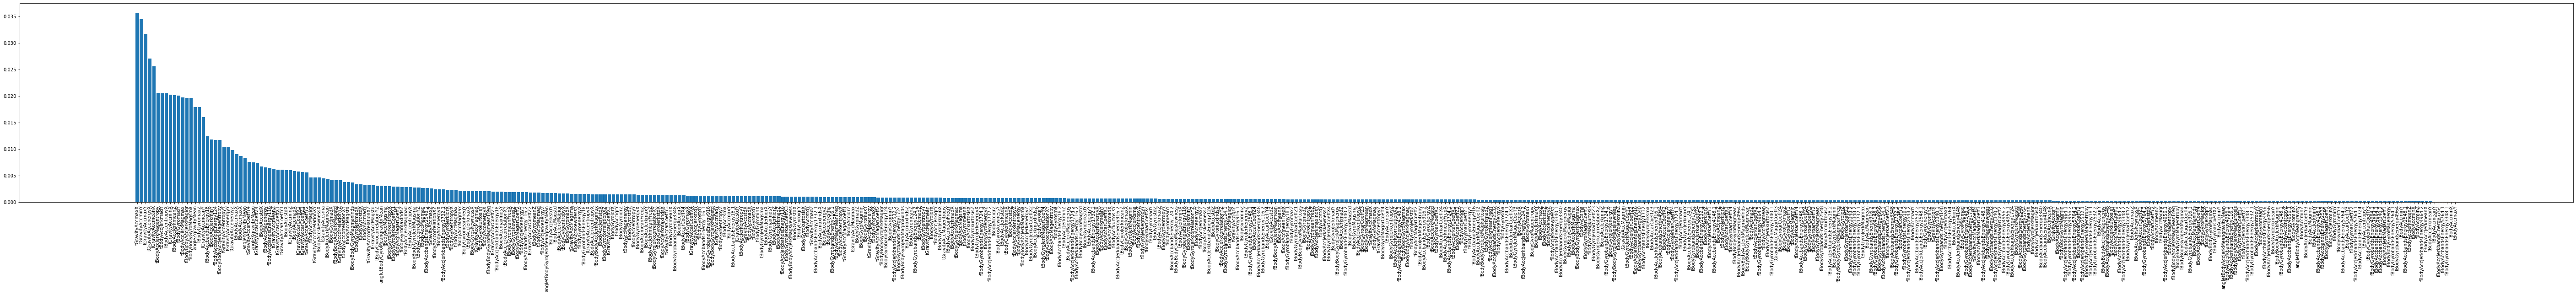

In [81]:
plt.figure(figsize=(100,8))
plt.bar(ordered_features["features"],ordered_features["importance"])
plt.xticks(rotation=90)
plt.show()

In [82]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc = etc.fit(X_train, y_train)
model = SelectFromModel(etc, prefit=True)
features= X_train.columns[model.get_support()]
features= list(features)
df_etc_fs= X_train[features]
df_etc_fs

tBodyAccstdX  tBodyAccmaxX  tBodyAccenergyX  tBodyAcccorrelationXY  \
0        -0.915584     -0.789914        -0.996081               0.212683   
1        -0.034498      0.283234        -0.532367              -0.369067   
2        -0.990874     -0.936624        -0.999896              -0.084024   
3        -0.995733     -0.938433        -0.999973               0.554353   
4         0.473123      0.539911         0.083830              -0.586883   
...            ...           ...              ...                    ...   
8234     -0.988057     -0.934746        -0.999868              -0.241105   
8235     -0.988656     -0.932550        -0.999831              -0.045546   
8236     -0.983932     -0.921052        -0.999803              -0.068370   
8237     -0.994152     -0.934076        -0.999951               0.021817   
8238     -0.319141     -0.311890        -0.766142              -0.129662   

      tBodyAcccorrelationXZ  tGravityAccmeanX  tGravityAccmeanY  \
0                 -0.194659          0.948900         -0.244501   
1                  0.123436          0.937160         -0.223484   
2                 -0.387905         -0.468033          0.781075   
3                 -0.099641          0.960576         -0.190425   
4                 -0.043553          0.921750         -0.237561   
...                     ...               ...               ...   
8234              -0.051827         -0.567957          0.249953   
8235              -0.152104         -0.253622          0.747791   
8236              -0.255798          0.957125         -0.226334   
8237              -0.026155          0.968711         -0.153171   
8238              -0.125199          0.955953         -0.124537   

      tGravityAccmeanZ  tGravityAccmaxX  tGravityAccmaxY  ...  fBodyAccMagmax  \
0             0.099113         0.876946        -0.261083  ...       -0.898544   
1             0.128010         0.867357        -0.241764  ...       -0.657062   
2             0.646752        -0.533744         0.732936  ...       -0.994250   
3             0.076347         0.886141        -0.209256  ...       -0.988475   
4            -0.019322         0.864241        -0.242723  ...       -0.158352   
...                ...              ...              ...  ...             ...   
8234         -0.985630        -0.623367         0.220661  ...       -0.969213   
8235          0.662405        -0.318568         0.700756  ...       -0.991976   
8236          0.032493         0.883318        -0.243127  ...       -0.973794   
8237         -0.033172         0.895439        -0.170080  ...       -0.956870   
8238          0.116410         0.886305        -0.138935  ...       -0.737156   

      fBodyAccMagiqr  fBodyAccMagentropy  fBodyBodyAccJerkMagmax  \
0          -0.870259           -0.166597               -0.897818   
1          -0.535822            0.576380                0.237042   
2          -0.991474           -0.946182               -0.996628   
3          -0.972858           -0.748065               -0.983343   
4          -0.088443            0.748326                0.350007   
...              ...                 ...                     ...   
8234       -0.976243           -0.716573               -0.933782   
8235       -0.991715           -0.946182               -0.994352   
8236       -0.959787           -0.625686               -0.962695   
8237       -0.986547           -0.763713               -0.985092   
8238       -0.591539            0.391594               -0.411940   

      fBodyBodyAccJerkMagmin  fBodyBodyGyroMagmeanFreq  \
0                  -0.876171                 -0.364414   
1                  -0.164601                  0.210468   
2                  -0.991395                  0.212428   
3                  -0.990459                 -0.669957   
4                  -0.691822                  0.190336   
...                      ...                       ...   
8234               -0.982983                 -0.190059   
8235               -0.980333      

# PCA

In [83]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pca = pca.fit(X_train);
X_pca = pca.fit_transform(X_train)
print(X_pca.shape)
df_pca_fs= pd.DataFrame(X_pca)
df_pca_fs

(8239, 20)


0         1         2         3         4         5         6  \
0     -1.629780 -2.013176 -0.898203 -1.853813  0.479444 -0.058437 -0.645483   
1      7.437959  2.456241 -0.465158 -1.182498 -1.108534  0.494829 -0.750088   
2     -5.986825  2.320519  2.140062 -0.539755  0.496246 -0.031781 -0.357564   
3     -5.175982 -1.004414 -1.308299  0.155100 -0.360386  0.068221 -0.581113   
4     10.975232  2.458529 -0.384013  0.489796 -2.650104 -0.424662  0.548514   
...         ...       ...       ...       ...       ...       ...       ...   
8234  -5.018410  1.368798  1.063106 -0.303520  1.010941 -0.024541  0.562359   
8235  -5.982572  2.189544  1.930577 -0.595907  0.501976 -0.148544 -0.152868   
8236  -4.069518 -1.329163 -1.407694 -1.189150  0.412294  0.095926 -0.785972   
8237  -5.131896 -1.171430 -1.093585  0.598871 -0.289210  0.668549 -1.153497   
8238   5.024582  0.688690 -0.651580 -1.363182  0.161663  0.784066 -0.003018   

             7         8         9        10        11        12        13  \
0     0.051697  0.858525 -0.511212  0.488688 -0.441779  0.260939 -0.216394   
1     0.775529 -1.594839  0.260768 -1.086174  0.723280 -0.866665  0.056268   
2    -0.589294 -0.211159 -0.477933  0.019470 -0.265789  0.018402  0.224991   
3     0.706724  0.997189 -1.031512 -0.088256  0.270504  0.319312 -0.233900   
4     0.008507  0.563998 -0.013996  0.633078  0.860459  0.352455 -0.415574   
...        ...       ...       ...       ...       ...       ...       ...   
8234  0.455830 -0.552808  0.833980 -0.041367  1.251807  0.436524 -0.850440   
8235 -0.565166 -0.030631 -0.510333 -0.201295 -0.478268  0.471594  0.796811   
8236  0.610209  0.758484 -1.382817 -0.244553  0.285826  0.205592  0.428628   
8237  1.124676 -0.074139 -0.557696 -1.431312  0.461216 -0.553969  0.545985   
8238  0.016956 -0.644647 -0.258080 -0.167595  0.081829  0.316958 -1.013667   

            14        15        16        17        18        19  
0     0.263270 -0.362791 -0.097445  0.044716 -0.275499  0.422586  
1     0.959247 -0.413592  1.666371 -1.132208 -0.910734 -0.934845  
2     0.558902  0.059524  0.201779 -0.235195  0.267409  0.050186  
3     0.316789  0.117915  0.185102  0.246758 -0.241573 -0.164113  
4    -1.085162  0.148413  0.577584 -1.306507  0.178569 -0.165655  
...        ...       ...       ...       ...       ...       ...  
8234  0.129540 -0.215804 -0.695569 -0.436943 -1.302689  0.859973  
8235 -0.415612 -0.384574  0.354398 -0.245172  0.088096 -0.343638  
8236  0.394326  0.066849  0.523767  0.376430 -0.711780  0.186083  
8237  0.270474 -0.116398  0.009447  0.844098 -0.247378  0.465624  
8238  0.628809  0.780037 -0.442626  0.383189 -0.594110  0.480652  

[8239 rows x 20 columns]

# comparing different feature selection methods 

# KNN

In [84]:
knn = KNeighborsClassifier()
fs_knn_gs_results=  fs_framework(knn,df_anova_fs,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.4s finished


---------------------
|      Accuracy     |
---------------------

    0.9214710523121739


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1525
           1       0.85      0.77      0.81      1440
           2       0.80      0.87      0.83      1514
           3       0.96      0.99      0.97      1382
           4       0.97      0.96      0.97      1137
           5       0.97      0.96      0.96      1241

    accuracy                           0.92      8239
   macro avg       0.93      0.92      0.92      8239
weighted avg       0.92      0.92      0.92      8239

----------------------------
| macro averaged f1 score |
----------------------------

	0.924110532063144


--------------------------
|        Best Score      |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.8820245175385363



In [85]:
knn = KNeighborsClassifier()
fs_knn_gs_results=  fs_framework(knn,df_ig_fs,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.4s finished


---------------------
|      Accuracy     |
---------------------

    0.9701420075251851


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1525
           1       0.93      0.93      0.93      1440
           2       0.94      0.95      0.95      1514
           3       0.99      1.00      0.99      1382
           4       0.99      0.99      0.99      1137
           5       0.99      0.99      0.99      1241

    accuracy                           0.97      8239
   macro avg       0.97      0.97      0.97      8239
weighted avg       0.97      0.97      0.97      8239

----------------------------
| macro averaged f1 score |
----------------------------

	0.9717500064021639


--------------------------
|        Best Score      |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.92632601043816



In [86]:
knn = KNeighborsClassifier()
fs_knn_gs_results=  fs_framework(knn,df_etc_fs,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    7.2s finished


---------------------
|      Accuracy     |
---------------------

    0.9703847554314844


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1525
           1       0.94      0.90      0.92      1440
           2       0.92      0.95      0.93      1514
           3       0.99      1.00      1.00      1382
           4       1.00      0.98      0.99      1137
           5       0.98      1.00      0.99      1241

    accuracy                           0.97      8239
   macro avg       0.97      0.97      0.97      8239
weighted avg       0.97      0.97      0.97      8239

----------------------------
| macro averaged f1 score |
----------------------------

	0.9716438344736668


--------------------------
|        Best Score      |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9567908726787231



In [87]:
knn = KNeighborsClassifier()
fs_knn_gs_results=  fs_framework(knn,df_pca_fs,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.6s finished


---------------------
|      Accuracy     |
---------------------

    0.9527855322247846


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1525
           1       0.89      0.87      0.88      1440
           2       0.89      0.90      0.89      1514
           3       0.98      1.00      0.99      1382
           4       0.99      0.96      0.98      1137
           5       0.98      0.99      0.99      1241

    accuracy                           0.95      8239
   macro avg       0.96      0.95      0.95      8239
weighted avg       0.95      0.95      0.95      8239

----------------------------
| macro averaged f1 score |
----------------------------

	0.9546515965362726


--------------------------
|        Best Score      |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9229275397499697



# Logistic Regression

In [88]:
lr= linear_model.LogisticRegression()
fs_lr_gs_results=  fs_framework(lr,df_anova_fs,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    1.8s finished


---------------------
|      Accuracy     |
---------------------

    0.8888214589149168


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1525
           1       0.81      0.74      0.78      1440
           2       0.78      0.83      0.81      1514
           3       0.92      0.93      0.93      1382
           4       0.93      0.93      0.93      1137
           5       0.91      0.90      0.90      1241

    accuracy                           0.89      8239
   macro avg       0.89      0.89      0.89      8239
weighted avg       0.89      0.89      0.89      8239

----------------------------
| macro averaged f1 score |
----------------------------

	0.8902078289128746


--------------------------
|        Best Score      |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.8857871100861755



In [89]:
lr= linear_model.LogisticRegression()
fs_lr_gs_results=  fs_framework(lr,df_ig_fs,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    3.7s finished


---------------------
|      Accuracy     |
---------------------

    0.8820245175385363


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1525
           1       0.89      0.61      0.72      1440
           2       0.76      0.94      0.84      1514
           3       0.96      0.97      0.96      1382
           4       0.97      0.95      0.96      1137
           5       0.93      0.94      0.93      1241

    accuracy                           0.88      8239
   macro avg       0.89      0.89      0.88      8239
weighted avg       0.89      0.88      0.88      8239

----------------------------
| macro averaged f1 score |
----------------------------

	0.8833636036436805


--------------------------
|        Best Score      |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.8785046728971962



In [90]:
lr= linear_model.LogisticRegression()
fs_lr_gs_results=  fs_framework(lr,df_etc_fs,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    9.1s finished


---------------------
|      Accuracy     |
---------------------

    0.971234373103532


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1525
           1       0.93      0.93      0.93      1440
           2       0.93      0.93      0.93      1514
           3       0.99      1.00      0.99      1382
           4       0.99      0.99      0.99      1137
           5       0.99      0.99      0.99      1241

    accuracy                           0.97      8239
   macro avg       0.97      0.97      0.97      8239
weighted avg       0.97      0.97      0.97      8239

----------------------------
| macro averaged f1 score |
----------------------------

	0.972646553764308


--------------------------
|        Best Score      |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9668649107901445



In [91]:
lr= linear_model.LogisticRegression()
fs_lr_gs_results=  fs_framework(lr,df_pca_fs,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    2.0s finished


---------------------
|      Accuracy     |
---------------------

    0.9094550309503581


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1525
           1       0.82      0.79      0.81      1440
           2       0.82      0.83      0.82      1514
           3       0.96      0.96      0.96      1382
           4       0.94      0.93      0.94      1137
           5       0.94      0.95      0.95      1241

    accuracy                           0.91      8239
   macro avg       0.91      0.91      0.91      8239
weighted avg       0.91      0.91      0.91      8239

----------------------------
| macro averaged f1 score |
----------------------------

	0.9112649466324951


--------------------------
|        Best Score      |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9078771695594126



# Decision Trees

In [92]:
dt = DecisionTreeClassifier()
fs_dt_gs_results = fs_framework(dt,df_anova_fs,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  20 | elapsed:    0.0s remaining:    0.1s


---------------------
|      Accuracy     |
---------------------

    0.9201359388275276


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1525
           1       0.88      0.84      0.86      1440
           2       0.85      0.89      0.87      1514
           3       0.95      0.95      0.95      1382
           4       0.93      0.93      0.93      1137
           5       0.92      0.92      0.92      1241

    accuracy                           0.92      8239
   macro avg       0.92      0.92      0.92      8239
weighted avg       0.92      0.92      0.92      8239

----------------------------
| macro averaged f1 score |
----------------------------

	0.9203518915845024


--------------------------
|        Best Score      |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.8707367398956184



[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.4s finished


In [93]:
dt = DecisionTreeClassifier()
fs_dt_gs_results = fs_framework(dt,df_ig_fs,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done   5 out of  20 | elapsed:    0.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.7s finished


---------------------
|      Accuracy     |
---------------------

    0.9516931666464377


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1525
           1       0.91      0.93      0.92      1440
           2       0.93      0.94      0.93      1514
           3       0.95      0.98      0.96      1382
           4       0.98      0.94      0.96      1137
           5       0.95      0.95      0.95      1241

    accuracy                           0.95      8239
   macro avg       0.95      0.95      0.95      8239
weighted avg       0.95      0.95      0.95      8239

----------------------------
| macro averaged f1 score |
----------------------------

	0.9521935753498286


--------------------------
|        Best Score      |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.8902779463527127



In [94]:
dt = DecisionTreeClassifier()
fs_dt_gs_results = fs_framework(dt,df_etc_fs,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.2s finished


---------------------
|      Accuracy     |
---------------------

    0.973661852166525


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1525
           1       0.99      0.94      0.96      1440
           2       0.95      0.99      0.97      1514
           3       0.98      0.97      0.98      1382
           4       0.99      0.96      0.97      1137
           5       0.94      0.98      0.96      1241

    accuracy                           0.97      8239
   macro avg       0.97      0.97      0.97      8239
weighted avg       0.97      0.97      0.97      8239

----------------------------
| macro averaged f1 score |
----------------------------

	0.9730812542025911


--------------------------
|        Best Score      |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9317878383298944



In [95]:
dt = DecisionTreeClassifier()
fs_dt_gs_results = fs_framework(dt,df_pca_fs,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  20 | elapsed:    0.0s remaining:    0.1s


---------------------
|      Accuracy     |
---------------------

    0.9317878383298944


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1525
           1       0.87      0.88      0.88      1440
           2       0.89      0.88      0.88      1514
           3       0.94      0.96      0.95      1382
           4       0.96      0.92      0.94      1137
           5       0.94      0.96      0.95      1241

    accuracy                           0.93      8239
   macro avg       0.93      0.93      0.93      8239
weighted avg       0.93      0.93      0.93      8239

----------------------------
| macro averaged f1 score |
----------------------------

	0.9322631563834517


--------------------------
|        Best Score      |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.8532588906420682



[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.5s finished


# Random Forest

In [96]:
rf= RandomForestClassifier()
fs_rf_gs_results= fs_framework(rf,df_anova_fs,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  85 out of 100 | elapsed:    6.6s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.9s finished


---------------------
|      Accuracy     |
---------------------

    0.9327588299550916


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1525
           1       0.94      0.76      0.84      1440
           2       0.81      0.95      0.88      1514
           3       0.97      0.98      0.97      1382
           4       0.98      0.93      0.95      1137
           5       0.94      0.98      0.96      1241

    accuracy                           0.93      8239
   macro avg       0.94      0.93      0.93      8239
weighted avg       0.94      0.93      0.93      8239

----------------------------
| macro averaged f1 score |
----------------------------

	0.933609420418202


--------------------------
|        Best Score      |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.8970748877290934



In [97]:
rf= RandomForestClassifier()
fs_rf_gs_results= fs_framework(rf,df_ig_fs,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   14.6s finished


---------------------
|      Accuracy     |
---------------------

    0.9639519359145527


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1525
           1       0.94      0.92      0.93      1440
           2       0.92      0.95      0.94      1514
           3       0.98      0.99      0.99      1382
           4       0.99      0.95      0.97      1137
           5       0.96      0.99      0.98      1241

    accuracy                           0.96      8239
   macro avg       0.97      0.96      0.96      8239
weighted avg       0.96      0.96      0.96      8239

----------------------------
| macro averaged f1 score |
----------------------------

	0.9647345754826414


--------------------------
|        Best Score      |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9178298337176842



In [98]:
rf= RandomForestClassifier()
fs_rf_gs_results= fs_framework(rf,df_etc_fs,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   19.4s finished


---------------------
|      Accuracy     |
---------------------

    0.9843427600436946


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1525
           1       0.98      0.95      0.97      1440
           2       0.96      0.99      0.97      1514
           3       1.00      0.99      0.99      1382
           4       0.99      0.98      0.99      1137
           5       0.98      0.99      0.99      1241

    accuracy                           0.98      8239
   macro avg       0.98      0.98      0.98      8239
weighted avg       0.98      0.98      0.98      8239

----------------------------
| macro averaged f1 score |
----------------------------

	0.9844706413030213


--------------------------
|        Best Score      |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9616458308047093



In [99]:
rf= RandomForestClassifier()
fs_rf_gs_results= fs_framework(rf,df_pca_fs,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.4s finished


---------------------
|      Accuracy     |
---------------------

    0.9446534773637577


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1525
           1       0.89      0.85      0.87      1440
           2       0.87      0.90      0.88      1514
           3       0.99      0.98      0.98      1382
           4       0.98      0.97      0.97      1137
           5       0.96      0.98      0.97      1241

    accuracy                           0.94      8239
   macro avg       0.95      0.95      0.95      8239
weighted avg       0.94      0.94      0.94      8239

----------------------------
| macro averaged f1 score |
----------------------------

	0.9463948419531573


--------------------------
|        Best Score      |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.8988954970263382



# Linear SVM

In [100]:
linsvm= LinearSVC()
fs_linsvm_gs_results= fs_framework(linsvm,df_anova_fs,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    3.0s finished


---------------------
|      Accuracy     |
---------------------

    0.8925840514625561


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1525
           1       0.81      0.75      0.78      1440
           2       0.78      0.83      0.81      1514
           3       0.93      0.94      0.94      1382
           4       0.93      0.94      0.93      1137
           5       0.92      0.90      0.91      1241

    accuracy                           0.89      8239
   macro avg       0.89      0.89      0.89      8239
weighted avg       0.89      0.89      0.89      8239

----------------------------
| macro averaged f1 score |
----------------------------

	0.8941446611076079


--------------------------
|        Best Score      |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.890156572399563



In [101]:
linsvm= LinearSVC()
fs_linsvm_gs_results= fs_framework(linsvm,df_ig_fs,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   12.4s finished


---------------------
|      Accuracy     |
---------------------

    0.871222235708217


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1525
           1       0.90      0.52      0.66      1440
           2       0.74      0.95      0.83      1514
           3       0.96      0.97      0.97      1382
           4       0.97      0.95      0.96      1137
           5       0.93      0.94      0.94      1241

    accuracy                           0.87      8239
   macro avg       0.89      0.88      0.87      8239
weighted avg       0.88      0.87      0.86      8239

----------------------------
| macro averaged f1 score |
----------------------------

	0.8703472498940682


--------------------------
|        Best Score      |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.8653962859570337



In [102]:
linsvm= LinearSVC()
fs_linsvm_gs_results= fs_framework(linsvm,df_etc_fs,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    7.4s finished


---------------------
|      Accuracy     |
---------------------

    0.9746328437917223


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1525
           1       0.93      0.93      0.93      1440
           2       0.93      0.94      0.94      1514
           3       0.99      1.00      1.00      1382
           4       1.00      1.00      1.00      1137
           5       1.00      0.99      0.99      1241

    accuracy                           0.97      8239
   macro avg       0.98      0.98      0.98      8239
weighted avg       0.97      0.97      0.97      8239

----------------------------
| macro averaged f1 score |
----------------------------

	0.976127024566723


--------------------------
|        Best Score      |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9690496419468382



In [103]:
linsvm= LinearSVC()
fs_linsvm_gs_results= fs_framework(linsvm,df_pca_fs,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    4.1s finished


---------------------
|      Accuracy     |
---------------------

    0.910183274669256


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1525
           1       0.83      0.78      0.80      1440
           2       0.81      0.85      0.83      1514
           3       0.95      0.97      0.96      1382
           4       0.95      0.93      0.94      1137
           5       0.94      0.95      0.95      1241

    accuracy                           0.91      8239
   macro avg       0.91      0.91      0.91      8239
weighted avg       0.91      0.91      0.91      8239

----------------------------
| macro averaged f1 score |
----------------------------

	0.9119978802961587


--------------------------
|        Best Score      |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9095764049035077



# Kernel SVM

In [104]:
ksvm = SVC()
fs_ksvm_gs_results = fs_framework(ksvm,df_anova_fs,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    1.7s finished


---------------------
|      Accuracy     |
---------------------

    0.8876077193834203


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1525
           1       0.82      0.68      0.75      1440
           2       0.74      0.86      0.80      1514
           3       0.94      0.94      0.94      1382
           4       0.95      0.92      0.93      1137
           5       0.90      0.93      0.92      1241

    accuracy                           0.89      8239
   macro avg       0.89      0.89      0.89      8239
weighted avg       0.89      0.89      0.89      8239

----------------------------
| macro averaged f1 score |
----------------------------

	0.8893158359851844


--------------------------
|        Best Score      |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.8787474208034955



In [105]:
ksvm = SVC()
fs_ksvm_gs_results = fs_framework(ksvm,df_ig_fs,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    4.8s finished


---------------------
|      Accuracy     |
---------------------

    0.8900351984464134


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.94      0.86      0.90      1525
           1       0.79      0.78      0.78      1440
           2       0.80      0.88      0.84      1514
           3       0.96      0.97      0.96      1382
           4       0.99      0.93      0.96      1137
           5       0.92      0.95      0.93      1241

    accuracy                           0.89      8239
   macro avg       0.90      0.89      0.89      8239
weighted avg       0.89      0.89      0.89      8239

----------------------------
| macro averaged f1 score |
----------------------------

	0.8946373373850305


--------------------------
|        Best Score      |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.8865153538050734



In [106]:
ksvm = SVC()
fs_ksvm_gs_results = fs_framework(ksvm,df_etc_fs,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    4.6s finished


---------------------
|      Accuracy     |
---------------------

    0.9718412428692802


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1525
           1       0.93      0.93      0.93      1440
           2       0.94      0.93      0.93      1514
           3       0.99      1.00      0.99      1382
           4       0.99      0.99      0.99      1137
           5       0.99      0.99      0.99      1241

    accuracy                           0.97      8239
   macro avg       0.97      0.97      0.97      8239
weighted avg       0.97      0.97      0.97      8239

----------------------------
| macro averaged f1 score |
----------------------------

	0.9731420954509762


--------------------------
|        Best Score      |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9666221628838452



In [107]:
ksvm = SVC()
fs_ksvm_gs_results = fs_framework(ksvm,df_pca_fs,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    1.2s finished


---------------------
|      Accuracy     |
---------------------

    0.9714771210098313


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1525
           1       0.93      0.91      0.92      1440
           2       0.92      0.93      0.93      1514
           3       1.00      1.00      1.00      1382
           4       1.00      1.00      1.00      1137
           5       1.00      1.00      1.00      1241

    accuracy                           0.97      8239
   macro avg       0.97      0.97      0.97      8239
weighted avg       0.97      0.97      0.97      8239

----------------------------
| macro averaged f1 score |
----------------------------

	0.9732244434727332


--------------------------
|        Best Score      |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9509649229275398



# BUILDING CLASSIFICATION MODELS

In [108]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

In [109]:
#FUNCTION TO PLOT CONFUSION MATRIX
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [110]:
def classification_framework(model, Xtrain, ytrain, Xtest, class_labels, cm_normalize=True, print_cm=True, cm_cmap=plt.cm.Greens):
    
    #storing the results in the dictionary
    results = dict()
    
    #assigning grid search attributes on the basis of models
    if(model==knn):
        grid_params = { 'n_neighbors': [3,5,7,9,11], 'leaf_size':np.random.randint(0,50,10), 'metric' : ['minkowski','euclidean','manhattan']}
    elif(model==lr):
        grid_params = {'C':[0.001,0.01,0.1,1,10,100,1000],'penalty':['l2','l1']}
    elif(model==dt):
        grid_params = {'max_depth':np.arange(3,10,2)}
    elif(model==rf):
        grid_params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2), 'criterion': ['gini', 'entropy']}
    elif(model==linsvm):
        grid_params = {'C':[0.001, 0.01, 0.1, 0.125, 0.5, 1, 2, 8, 16, 50]}
    elif(model==ksvm):
        grid_params = {'C':[0.001,0.01,0.1,1,2,4,8,10,16], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
    
    #building the models by passing the grid search attributes
    model = GridSearchCV(model, grid_params, verbose = 1, cv=5, n_jobs = -1)
    
    #fitting the model
    model.fit(Xtrain,ytrain)
    
    #predicting the y labels for ytrain
    y_train_pred = model.predict(Xtrain)
    results['y_train_labels']= y_train_pred
    
    #predicting the y labels for ytest
    y_test_pred= model.predict(Xtest)
    results['y_test_labels']= y_test_pred
    
    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=ytrain, y_pred=y_train_pred)
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy     |')
    print('---------------------')
    print('\n{}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(ytrain, y_train_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('-------------------------')
    print('|  Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(ytrain, y_train_pred)
    results['classification_report'] = classification_report
    print(classification_report)
    
    # get f1 score
    print('----------------------------')
    print('| macro averaged f1 score  |')
    print('----------------------------')
    f1_sc= f1_score(ytrain, y_train_pred, average='macro')
    results['f1_score'] = f1_sc
    print("\n\t{0}\n".format(f1_sc))
    
     # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator    |')
    print('--------------------------')
    results['best_estimator'] = model.best_estimator_
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters    |')
    print('--------------------------')
    results['best_hyperparameters'] = model.best_params_
    print('\n\tHyperparameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets  |')
    print('---------------------------------')
    results['number_of cross_validation_sets'] = model.n_splits_
    print('\n\tTotal number of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score      |')
    print('--------------------------')
    results['avergae_cross_validated_score'] = model.best_score_
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

    # add the trained  model to the results
    results['model'] = model
    
    return results

In [111]:
# we will use extra tree classifier as the feature selection method as it gives the best score as well as f1 score similar to raw model
X_train= df_etc_fs
X_train

tBodyAccstdX  tBodyAccmaxX  tBodyAccenergyX  tBodyAcccorrelationXY  \
0        -0.915584     -0.789914        -0.996081               0.212683   
1        -0.034498      0.283234        -0.532367              -0.369067   
2        -0.990874     -0.936624        -0.999896              -0.084024   
3        -0.995733     -0.938433        -0.999973               0.554353   
4         0.473123      0.539911         0.083830              -0.586883   
...            ...           ...              ...                    ...   
8234     -0.988057     -0.934746        -0.999868              -0.241105   
8235     -0.988656     -0.932550        -0.999831              -0.045546   
8236     -0.983932     -0.921052        -0.999803              -0.068370   
8237     -0.994152     -0.934076        -0.999951               0.021817   
8238     -0.319141     -0.311890        -0.766142              -0.129662   

      tBodyAcccorrelationXZ  tGravityAccmeanX  tGravityAccmeanY  \
0                 -0.194659          0.948900         -0.244501   
1                  0.123436          0.937160         -0.223484   
2                 -0.387905         -0.468033          0.781075   
3                 -0.099641          0.960576         -0.190425   
4                 -0.043553          0.921750         -0.237561   
...                     ...               ...               ...   
8234              -0.051827         -0.567957          0.249953   
8235              -0.152104         -0.253622          0.747791   
8236              -0.255798          0.957125         -0.226334   
8237              -0.026155          0.968711         -0.153171   
8238              -0.125199          0.955953         -0.124537   

      tGravityAccmeanZ  tGravityAccmaxX  tGravityAccmaxY  ...  fBodyAccMagmax  \
0             0.099113         0.876946        -0.261083  ...       -0.898544   
1             0.128010         0.867357        -0.241764  ...       -0.657062   
2             0.646752        -0.533744         0.732936  ...       -0.994250   
3             0.076347         0.886141        -0.209256  ...       -0.988475   
4            -0.019322         0.864241        -0.242723  ...       -0.158352   
...                ...              ...              ...  ...             ...   
8234         -0.985630        -0.623367         0.220661  ...       -0.969213   
8235          0.662405        -0.318568         0.700756  ...       -0.991976   
8236          0.032493         0.883318        -0.243127  ...       -0.973794   
8237         -0.033172         0.895439        -0.170080  ...       -0.956870   
8238          0.116410         0.886305        -0.138935  ...       -0.737156   

      fBodyAccMagiqr  fBodyAccMagentropy  fBodyBodyAccJerkMagmax  \
0          -0.870259           -0.166597               -0.897818   
1          -0.535822            0.576380                0.237042   
2          -0.991474           -0.946182               -0.996628   
3          -0.972858           -0.748065               -0.983343   
4          -0.088443            0.748326                0.350007   
...              ...                 ...                     ...   
8234       -0.976243           -0.716573               -0.933782   
8235       -0.991715           -0.946182               -0.994352   
8236       -0.959787           -0.625686               -0.962695   
8237       -0.986547           -0.763713               -0.985092   
8238       -0.591539            0.391594               -0.411940   

      fBodyBodyAccJerkMagmin  fBodyBodyGyroMagmeanFreq  \
0                  -0.876171                 -0.364414   
1                  -0.164601                  0.210468   
2                  -0.991395                  0.212428   
3                  -0.990459                 -0.669957   
4                  -0.691822                  0.190336   
...                      ...                       ...   
8234               -0.982983                 -0.190059   
8235               -0.980333      

In [112]:
# transform X_test using extra tree classifier
X_test= X_test[X_train.columns]
X_test

tBodyAccstdX  tBodyAccmaxX  tBodyAccenergyX  tBodyAcccorrelationXY  \
0         0.283615      0.623434        -0.176077              -0.512413   
1         0.082014      0.595736        -0.409413              -0.786394   
2        -0.993584     -0.935388        -0.999949               0.209314   
3        -0.996289     -0.940376        -0.999977              -0.362275   
4        -0.997019     -0.940728        -0.999969              -0.156956   
...            ...           ...              ...                    ...   
2055     -0.417599     -0.310365        -0.828766              -0.292538   
2056     -0.974934     -0.908543        -0.999543               0.793135   
2057     -0.990721     -0.925886        -0.999892              -0.217025   
2058     -0.298805      0.062419        -0.752600              -0.326022   
2059     -0.439045     -0.201652        -0.841120              -0.064931   

      tBodyAcccorrelationXZ  tGravityAccmeanX  tGravityAccmeanY  \
0                 -0.247780          0.922960         -0.219514   
1                  0.005139          0.876087         -0.312670   
2                 -0.092623          0.966454         -0.169456   
3                 -0.222697          0.954276         -0.160415   
4                  0.028219          0.885306         -0.127321   
...                     ...               ...               ...   
2055              -0.030620          0.900631         -0.342170   
2056              -0.188010         -0.726727          0.184428   
2057               0.120319         -0.431820          0.773872   
2058              -0.311679          0.897433         -0.262988   
2059               0.216014          0.950309         -0.248119   

      tGravityAccmeanZ  tGravityAccmaxX  tGravityAccmaxY  ...  fBodyAccMagmax  \
0            -0.148679         0.861387        -0.222550  ...       -0.237710   
1             0.145461         0.812936        -0.313073  ...       -0.345204   
2            -0.037933         0.893267        -0.182093  ...       -0.964350   
3             0.161721         0.880046        -0.180181  ...       -0.986897   
4             0.357477         0.814113        -0.140153  ...       -0.993743   
...                ...              ...              ...  ...             ...   
2055          0.150484         0.829713        -0.355696  ...       -0.667588   
2056          0.983319        -0.787278         0.154667  ...       -0.979818   
2057          0.649616        -0.495053         0.728188  ...       -0.989311   
2058         -0.227457         0.826193        -0.275732  ...       -0.580751   
2059          0.096720         0.878878        -0.264776  ...       -0.757593   

      fBodyAccMagiqr  fBodyAccMagentropy  fBodyBodyAccJerkMagmax  \
0          -0.181251            0.698497               -0.198036   
1          -0.234472            0.725369               -0.115299   
2          -0.968073           -0.676235               -0.992038   
3          -0.990994           -0.946182               -0.990124   
4          -0.987621           -0.946182               -0.991815   
...              ...                 ...                     ...   
2055       -0.657608            0.339272               -0.324897   
2056       -0.985179           -0.873482               -0.993773   
2057       -0.991672           -0.907014               -0.996444   
2058       -0.436485            0.505209               -0.383893   
2059       -0.527924            0.308047               -0.637662   

      fBodyBodyAccJerkMagmin  fBodyBodyGyroMagmeanFreq  \
0                   0.016936                  0.170183   
1                  -0.679167                  0.312090   
2                  -0.993657                 -0.132998   
3                  -0.984861                  0.026456   
4                  -0.991207                 -0.198249   
...                      ...                       ...   
2055               -0.060583                  0.492444   
2056               -0.987247      

# KNN

Text(0, 0.5, 'macro averaged f1 score')

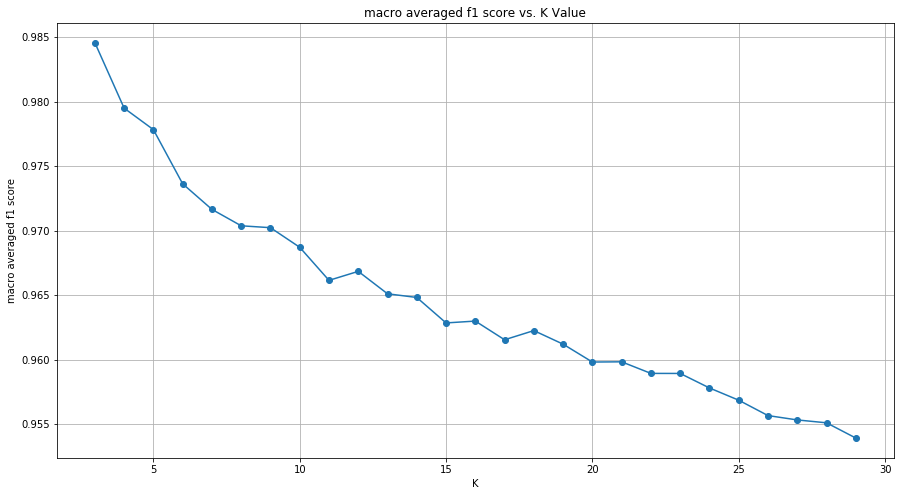

In [113]:
from sklearn.neighbors import KNeighborsClassifier
f1=[]
a= range(3,30)
for i in a:
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    y_pred = neigh.predict(X_train)
    f1.append(f1_score(y_train, y_pred, average='macro'))
    
plt.figure(figsize=(15,8))
plt.plot(a,f1,"o-")
plt.title('macro averaged f1 score vs. K Value')
plt.grid()
plt.xlabel('K')
plt.ylabel('macro averaged f1 score')

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  5.4min finished


---------------------
|      Accuracy     |
---------------------

0.9921106930452724


--------------------
| Confusion Matrix |
--------------------

 [[1525    0    0    0    0    0]
 [   0 1400   39    0    0    1]
 [   0   25 1489    0    0    0]
 [   0    0    0 1382    0    0]
 [   0    0    0    0 1137    0]
 [   0    0    0    0    0 1241]]


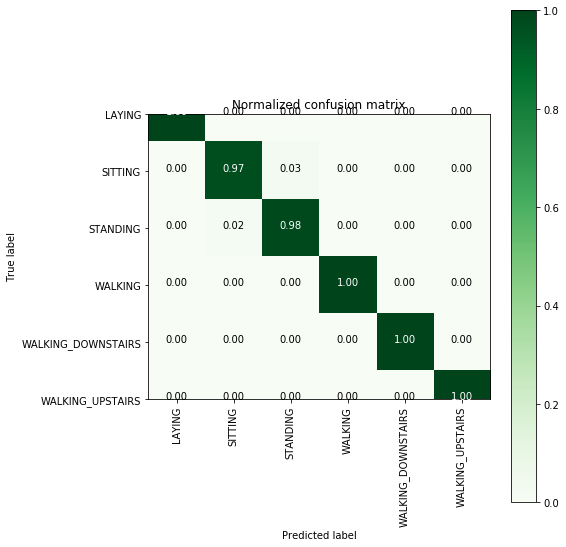

-------------------------
|  Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1525
           1       0.98      0.97      0.98      1440
           2       0.97      0.98      0.98      1514
           3       1.00      1.00      1.00      1382
           4       1.00      1.00      1.00      1137
           5       1.00      1.00      1.00      1241

    accuracy                           0.99      8239
   macro avg       0.99      0.99      0.99      8239
weighted avg       0.99      0.99      0.99      8239

----------------------------
| macro averaged f1 score  |
----------------------------

	0.9926451436721271

--------------------------
|      Best Estimator    |
--------------------------

	KNeighborsClassifier(algorithm='auto', leaf_size=34, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')


In [114]:
knn = KNeighborsClassifier()
knn_gs_results= classification_framework(knn, X_train, y_train, X_test, class_labels=labels)

# LOGISTIC REGRESSION

Text(0, 0.5, 'macro averaged f1 score')

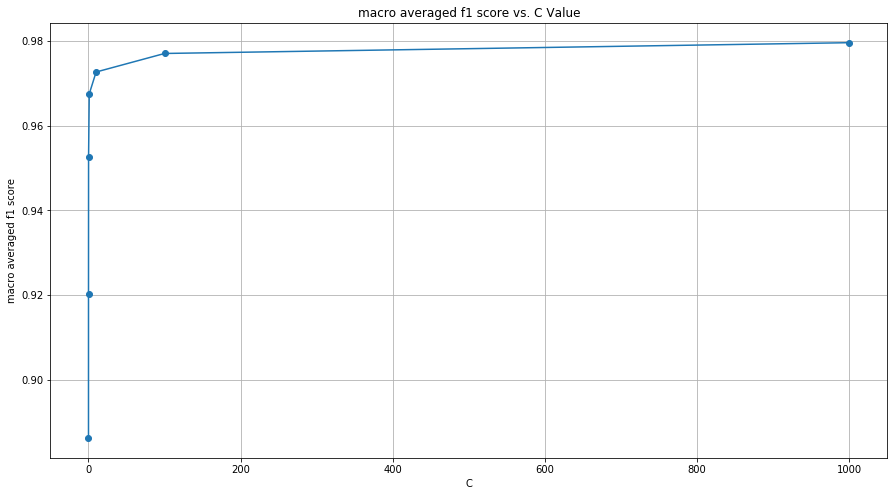

In [115]:
f1=[]
a= np.array([0.001,0.01,0.1,1,10,100,1000])
for i in a:
    C = linear_model.LogisticRegression(C = i).fit(X_train,y_train)
    y_pred = C.predict(X_train)
    f1.append(f1_score(y_train, y_pred, average='macro'))
    
plt.figure(figsize=(15,8))
plt.plot(a,f1,"o-")
plt.title('macro averaged f1 score vs. C Value')
plt.grid()
plt.xlabel('C')
plt.ylabel('macro averaged f1 score')

Text(0, 0.5, 'macro averaged f1 score')

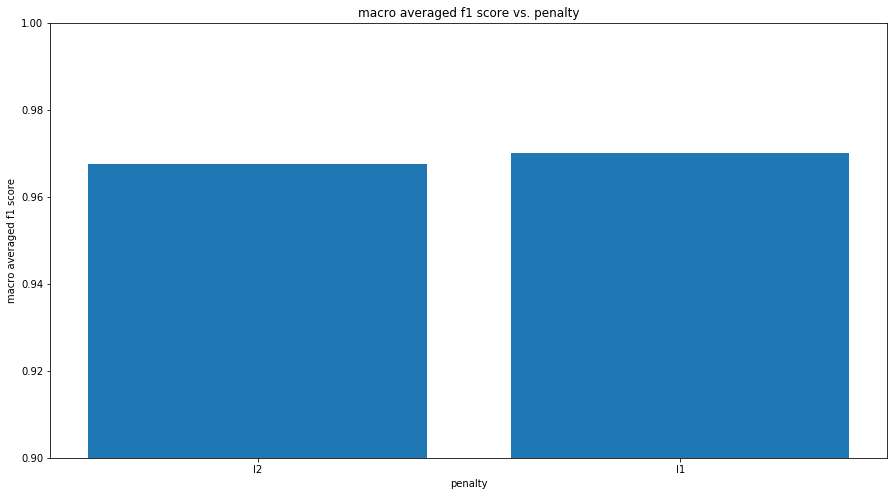

In [116]:
f1=[]
a= np.array(['l2','l1'])
for i in a:
    pen = linear_model.LogisticRegression(penalty = i).fit(X_train,y_train)
    y_pred = pen.predict(X_train)
    f1.append(f1_score(y_train, y_pred, average='macro'))
    
plt.figure(figsize=(15,8))
plt.bar(a,f1)
plt.title('macro averaged f1 score vs. penalty')
plt.ylim(0.9,1.0)
plt.xlabel('penalty')
plt.ylabel('macro averaged f1 score')

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:  7.9min finished


---------------------
|      Accuracy     |
---------------------

0.9781526884330622


--------------------
| Confusion Matrix |
--------------------

 [[1525    0    0    0    0    0]
 [   0 1355   84    0    0    1]
 [   0   90 1424    0    0    0]
 [   0    0    0 1381    0    1]
 [   0    0    0    0 1135    2]
 [   0    0    0    2    0 1239]]


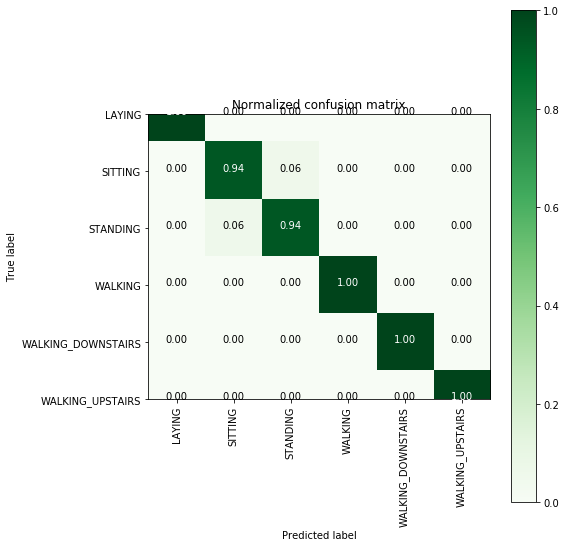

-------------------------
|  Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1525
           1       0.94      0.94      0.94      1440
           2       0.94      0.94      0.94      1514
           3       1.00      1.00      1.00      1382
           4       1.00      1.00      1.00      1137
           5       1.00      1.00      1.00      1241

    accuracy                           0.98      8239
   macro avg       0.98      0.98      0.98      8239
weighted avg       0.98      0.98      0.98      8239

----------------------------
| macro averaged f1 score  |
----------------------------

	0.9795638210812143

--------------------------
|      Best Estimator    |
--------------------------

	LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n

In [117]:
lr = linear_model.LogisticRegression()
lr_gs_results= classification_framework(lr, X_train, y_train, X_test, class_labels=labels)

# DECISION TREES

Text(0, 0.5, 'macro averaged f1 score')

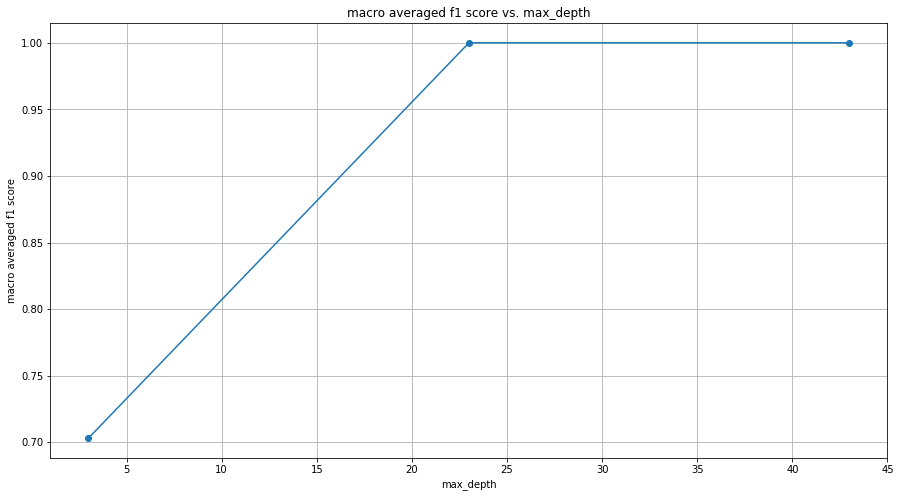

In [118]:
f1=[]
a= np.arange(3,50,20)
for i in a:
    C = DecisionTreeClassifier(max_depth = i).fit(X_train,y_train)
    y_pred = C.predict(X_train)
    f1.append(f1_score(y_train, y_pred, average='macro'))
    
plt.figure(figsize=(15,8))
plt.plot(a,f1,"o-")
plt.title('macro averaged f1 score vs. max_depth')
plt.grid()
plt.xlabel('max_depth')
plt.ylabel('macro averaged f1 score')

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.3s finished


---------------------
|      Accuracy     |
---------------------

0.973661852166525


--------------------
| Confusion Matrix |
--------------------

 [[1525    0    0    0    0    0]
 [   0 1360   80    0    0    0]
 [   0   19 1495    0    0    0]
 [   0    0    0 1341    7   34]
 [   0    0    0    4 1091   42]
 [   0    0    0   22    9 1210]]


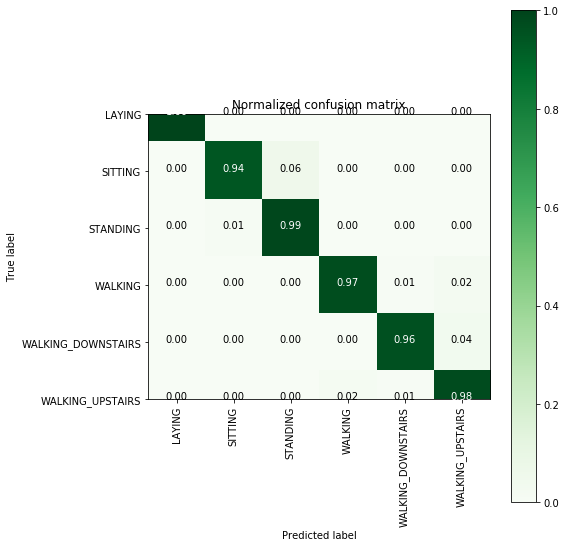

-------------------------
|  Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1525
           1       0.99      0.94      0.96      1440
           2       0.95      0.99      0.97      1514
           3       0.98      0.97      0.98      1382
           4       0.99      0.96      0.97      1137
           5       0.94      0.98      0.96      1241

    accuracy                           0.97      8239
   macro avg       0.97      0.97      0.97      8239
weighted avg       0.97      0.97      0.97      8239

----------------------------
| macro averaged f1 score  |
----------------------------

	0.9730812542025911

--------------------------
|      Best Estimator    |
--------------------------

	DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, m

In [119]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_gs_results = classification_framework(dt, X_train, y_train, X_test, class_labels=labels)

# RANDOM FOREST

Text(0, 0.5, 'macro averaged f1 score')

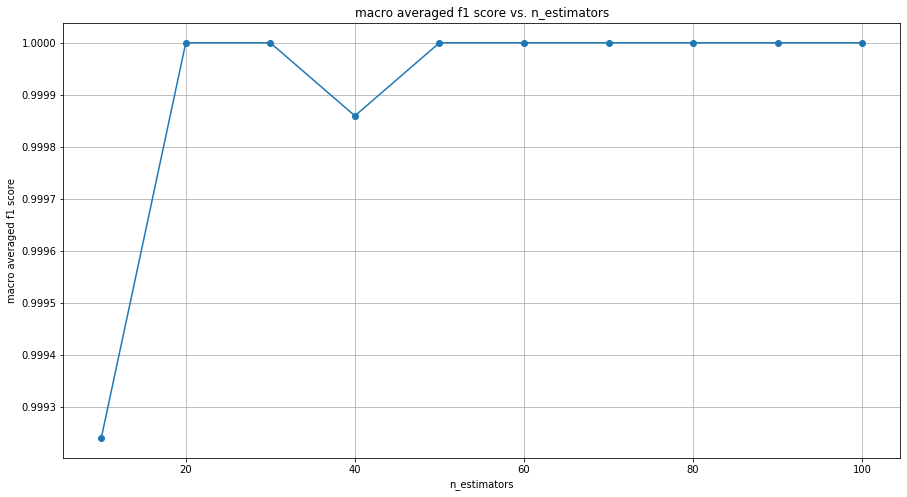

In [120]:
f1=[]
a= np.arange(10,101,10)
for i in a:
    C = RandomForestClassifier(n_estimators = i).fit(X_train,y_train)
    y_pred = C.predict(X_train)
    f1.append(f1_score(y_train, y_pred, average='macro'))
    
plt.figure(figsize=(15,8))
plt.plot(a,f1,"o-")
plt.title('macro averaged f1 score vs. n_estimators')
plt.grid()
plt.xlabel('n_estimators')
plt.ylabel('macro averaged f1 score')

Text(0, 0.5, 'macro averaged f1 score')

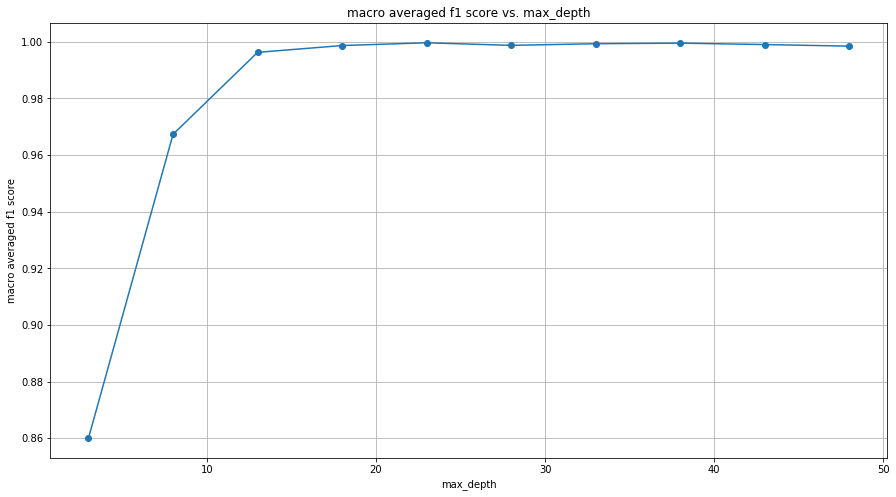

In [121]:
f1=[]
a= np.arange(3,50,5)
for i in a:
    C = RandomForestClassifier(max_depth = i).fit(X_train,y_train)
    y_pred = C.predict(X_train)
    f1.append(f1_score(y_train, y_pred, average='macro'))
    
plt.figure(figsize=(15,8))
plt.plot(a,f1,"o-")
plt.title('macro averaged f1 score vs. max_depth')
plt.grid()
plt.xlabel('max_depth')
plt.ylabel('macro averaged f1 score')

Text(0, 0.5, 'macro averaged f1 score')

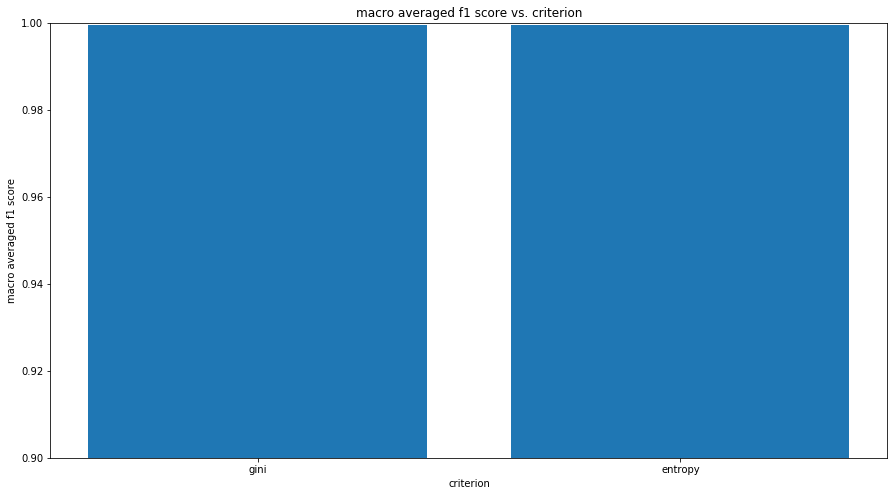

In [122]:
f1=[]
a= ['gini', 'entropy']
for i in a:
    C = RandomForestClassifier(criterion = i).fit(X_train,y_train)
    y_pred = C.predict(X_train)
    f1.append(f1_score(y_train, y_pred, average='macro'))
    
plt.figure(figsize=(15,8))
plt.bar(a,f1)
plt.title('macro averaged f1 score vs. criterion')
plt.ylim(0.9,1.0)
plt.xlabel('criterion')
plt.ylabel('macro averaged f1 score')

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  7.3min finished


---------------------
|      Accuracy     |
---------------------

0.9997572520937007


--------------------
| Confusion Matrix |
--------------------

 [[1525    0    0    0    0    0]
 [   0 1438    2    0    0    0]
 [   0    0 1514    0    0    0]
 [   0    0    0 1382    0    0]
 [   0    0    0    0 1137    0]
 [   0    0    0    0    0 1241]]


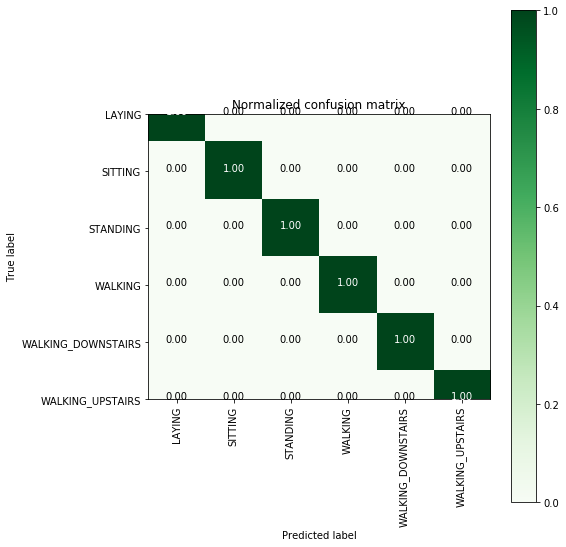

-------------------------
|  Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1525
           1       1.00      1.00      1.00      1440
           2       1.00      1.00      1.00      1514
           3       1.00      1.00      1.00      1382
           4       1.00      1.00      1.00      1137
           5       1.00      1.00      1.00      1241

    accuracy                           1.00      8239
   macro avg       1.00      1.00      1.00      8239
weighted avg       1.00      1.00      1.00      8239

----------------------------
| macro averaged f1 score  |
----------------------------

	0.9997741678267896

--------------------------
|      Best Estimator    |
--------------------------

	RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=13, max_features='auto', max_leaf_nodes=None,
                       min_im

In [123]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_gs_results = classification_framework(rf, X_train, y_train, X_test, class_labels=labels)

# LINEAR SVM

Text(0, 0.5, 'macro averaged f1 score')

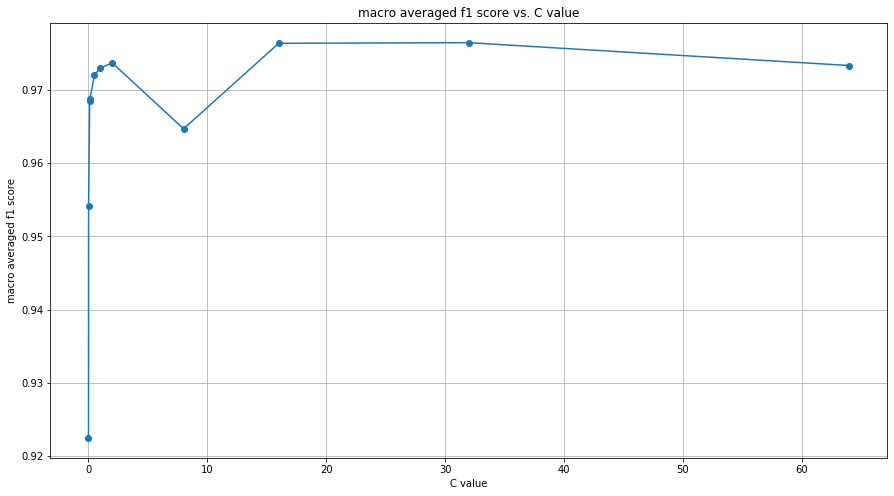

In [124]:
f1=[]
a= np.array([0.001, 0.01, 0.1, 0.125, 0.5, 1, 2, 8, 16, 32, 64])
for i in a:
    C = LinearSVC(C = i).fit(X_train,y_train)
    y_pred = C.predict(X_train)
    f1.append(f1_score(y_train, y_pred, average='macro'))
    
plt.figure(figsize=(15,8))
plt.plot(a,f1,"o-")
plt.title('macro averaged f1 score vs. C value')
plt.grid()
plt.xlabel('C value')
plt.ylabel('macro averaged f1 score')

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   15.1s finished


---------------------
|      Accuracy     |
---------------------

0.9734191042602257


--------------------
| Confusion Matrix |
--------------------

 [[1525    0    0    0    0    0]
 [   0 1286  153    0    0    1]
 [   0   52 1461    1    0    0]
 [   0    0    0 1380    0    2]
 [   0    0    0    0 1135    2]
 [   0    0    0    6    2 1233]]


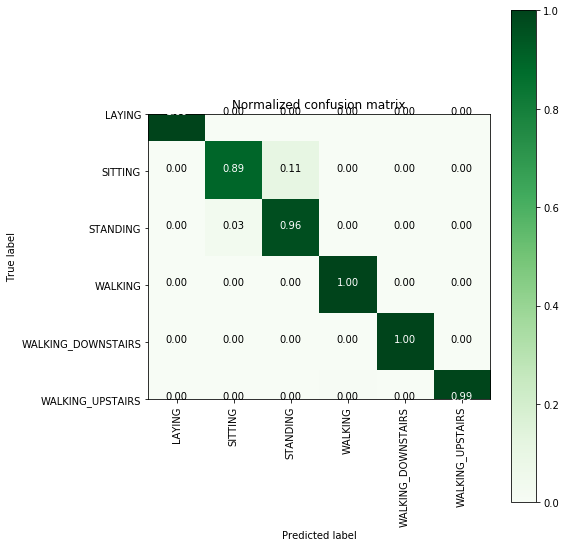

-------------------------
|  Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1525
           1       0.96      0.89      0.93      1440
           2       0.91      0.96      0.93      1514
           3       0.99      1.00      1.00      1382
           4       1.00      1.00      1.00      1137
           5       1.00      0.99      0.99      1241

    accuracy                           0.97      8239
   macro avg       0.98      0.97      0.97      8239
weighted avg       0.97      0.97      0.97      8239

----------------------------
| macro averaged f1 score  |
----------------------------

	0.9749559698340177

--------------------------
|      Best Estimator    |
--------------------------

	LinearSVC(C=8, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_stat

In [125]:
linsvm = LinearSVC()
linsvm_gs_results = classification_framework(linsvm, X_train, y_train, X_test, class_labels=labels)

# KERNEL SVM

Text(0, 0.5, 'macro averaged f1 score')

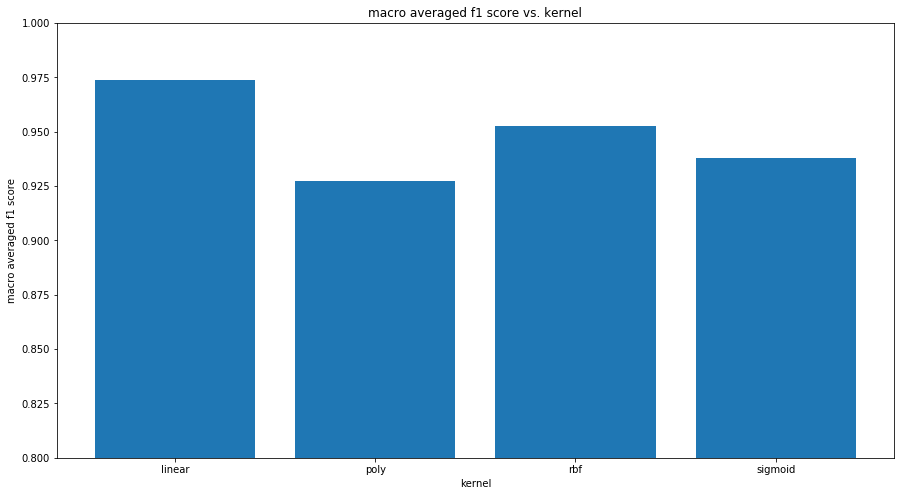

In [126]:
f1=[]
a= ['linear', 'poly', 'rbf', 'sigmoid']
for i in a:
    C = SVC(kernel = i).fit(X_train,y_train)
    y_pred = C.predict(X_train)
    f1.append(f1_score(y_train, y_pred, average='macro'))
    
plt.figure(figsize=(15,8))
plt.bar(a,f1)
plt.title('macro averaged f1 score vs. kernel')
plt.ylim(0.8,1.0)
plt.xlabel('kernel')
plt.ylabel('macro averaged f1 score')

Text(0, 0.5, 'macro averaged f1 score')

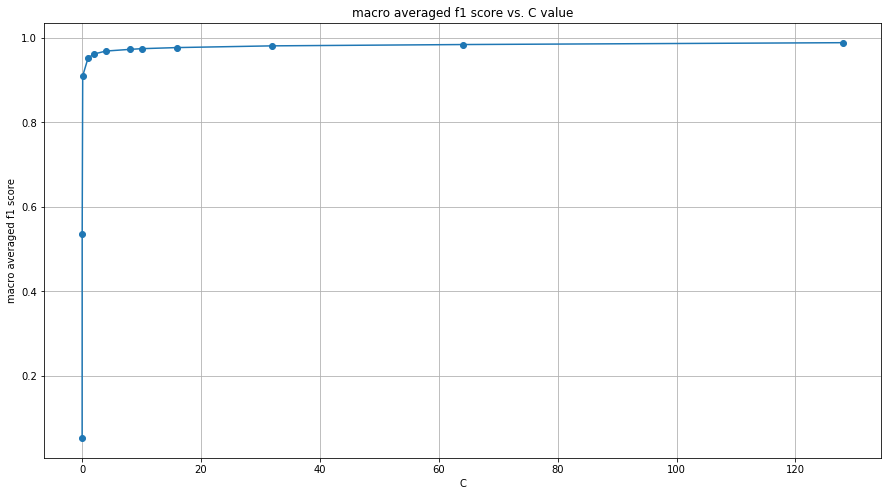

In [127]:
f1=[]
a= [0.001,0.01,0.1,1,2,4,8,10,16,32,64,128]
for i in a:
    C = SVC(C = i).fit(X_train,y_train)
    y_pred = C.predict(X_train)
    f1.append(f1_score(y_train, y_pred, average='macro'))
    
plt.figure(figsize=(15,8))
plt.plot(a,f1,"o-")
plt.title('macro averaged f1 score vs. C value')
plt.grid()
plt.xlabel('C')
plt.ylabel('macro averaged f1 score')

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  3.5min finished


---------------------
|      Accuracy     |
---------------------

0.9762107051826678


--------------------
| Confusion Matrix |
--------------------

 [[1525    0    0    0    0    0]
 [   0 1358   82    0    0    0]
 [   0   94 1420    0    0    0]
 [   0    0    0 1379    1    2]
 [   0    0    0    2 1131    4]
 [   0    0    0    6    5 1230]]


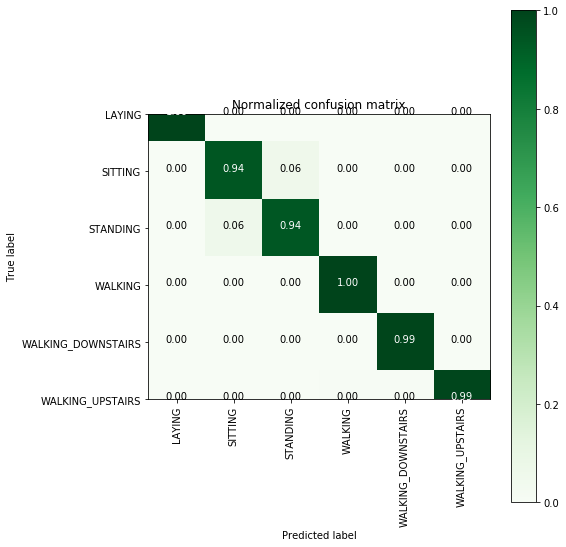

-------------------------
|  Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1525
           1       0.94      0.94      0.94      1440
           2       0.95      0.94      0.94      1514
           3       0.99      1.00      1.00      1382
           4       0.99      0.99      0.99      1137
           5       1.00      0.99      0.99      1241

    accuracy                           0.98      8239
   macro avg       0.98      0.98      0.98      8239
weighted avg       0.98      0.98      0.98      8239

----------------------------
| macro averaged f1 score  |
----------------------------

	0.9774457142131335

--------------------------
|      Best Estimator    |
--------------------------

	SVC(C=16, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_stat

In [128]:
from sklearn.svm import SVC
ksvm = SVC()
ksvm_gs_results = classification_framework(ksvm, X_train, y_train, X_test, class_labels=labels)

# From the above tuning we observe that RANDOM FOREST CLASSIFIER with {'criterion': 'entropy', 'max_depth': 13, 'n_estimators': 190} gives the best macro averaged F1 score and from the confusion matrix it is also able to distinguish beween all classes. Hence, we choose random forest as the final model to classify the test data

# PREDICT AND OUTPUT TEST DATA LABELS INTO A CSV FILE

In [129]:
X_test

tBodyAccstdX  tBodyAccmaxX  tBodyAccenergyX  tBodyAcccorrelationXY  \
0         0.283615      0.623434        -0.176077              -0.512413   
1         0.082014      0.595736        -0.409413              -0.786394   
2        -0.993584     -0.935388        -0.999949               0.209314   
3        -0.996289     -0.940376        -0.999977              -0.362275   
4        -0.997019     -0.940728        -0.999969              -0.156956   
...            ...           ...              ...                    ...   
2055     -0.417599     -0.310365        -0.828766              -0.292538   
2056     -0.974934     -0.908543        -0.999543               0.793135   
2057     -0.990721     -0.925886        -0.999892              -0.217025   
2058     -0.298805      0.062419        -0.752600              -0.326022   
2059     -0.439045     -0.201652        -0.841120              -0.064931   

      tBodyAcccorrelationXZ  tGravityAccmeanX  tGravityAccmeanY  \
0                 -0.247780          0.922960         -0.219514   
1                  0.005139          0.876087         -0.312670   
2                 -0.092623          0.966454         -0.169456   
3                 -0.222697          0.954276         -0.160415   
4                  0.028219          0.885306         -0.127321   
...                     ...               ...               ...   
2055              -0.030620          0.900631         -0.342170   
2056              -0.188010         -0.726727          0.184428   
2057               0.120319         -0.431820          0.773872   
2058              -0.311679          0.897433         -0.262988   
2059               0.216014          0.950309         -0.248119   

      tGravityAccmeanZ  tGravityAccmaxX  tGravityAccmaxY  ...  fBodyAccMagmax  \
0            -0.148679         0.861387        -0.222550  ...       -0.237710   
1             0.145461         0.812936        -0.313073  ...       -0.345204   
2            -0.037933         0.893267        -0.182093  ...       -0.964350   
3             0.161721         0.880046        -0.180181  ...       -0.986897   
4             0.357477         0.814113        -0.140153  ...       -0.993743   
...                ...              ...              ...  ...             ...   
2055          0.150484         0.829713        -0.355696  ...       -0.667588   
2056          0.983319        -0.787278         0.154667  ...       -0.979818   
2057          0.649616        -0.495053         0.728188  ...       -0.989311   
2058         -0.227457         0.826193        -0.275732  ...       -0.580751   
2059          0.096720         0.878878        -0.264776  ...       -0.757593   

      fBodyAccMagiqr  fBodyAccMagentropy  fBodyBodyAccJerkMagmax  \
0          -0.181251            0.698497               -0.198036   
1          -0.234472            0.725369               -0.115299   
2          -0.968073           -0.676235               -0.992038   
3          -0.990994           -0.946182               -0.990124   
4          -0.987621           -0.946182               -0.991815   
...              ...                 ...                     ...   
2055       -0.657608            0.339272               -0.324897   
2056       -0.985179           -0.873482               -0.993773   
2057       -0.991672           -0.907014               -0.996444   
2058       -0.436485            0.505209               -0.383893   
2059       -0.527924            0.308047               -0.637662   

      fBodyBodyAccJerkMagmin  fBodyBodyGyroMagmeanFreq  \
0                   0.016936                  0.170183   
1                  -0.679167                  0.312090   
2                  -0.993657                 -0.132998   
3                  -0.984861                  0.026456   
4                  -0.991207                 -0.198249   
...                      ...                       ...   
2055               -0.060583                  0.492444   
2056               -0.987247      

In [130]:
# extract predicted class labels from the random forest model
y_test_pred= rf_gs_results['y_test_labels']
y_test_pred

array([4, 4, 2, ..., 0, 3, 3])

In [131]:
# extract predicted class labels from the random forest model
y_train_pred= rf_gs_results['y_train_labels']
y_train_pred

array([2, 3, 0, ..., 2, 2, 3])

In [132]:
label_encoder.inverse_transform(y_train_pred)

array(['STANDING', 'WALKING', 'LAYING', ..., 'STANDING', 'STANDING',
       'WALKING'], dtype=object)

In [133]:
label_encoder.inverse_transform(y_test_pred)

array(['WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'STANDING', ...,
       'LAYING', 'WALKING', 'WALKING'], dtype=object)

In [134]:
df_test

index  tBodyAccmeanX  tBodyAccmeanY  tBodyAccmeanZ  tBodyAccstdX  \
0      6597       0.238337      -0.039950      -0.158257      0.283615   
1      7609       0.125920      -0.027658      -0.050069      0.082014   
2     10110       0.281630      -0.012995      -0.082664     -0.993584   
3      1924       0.276540      -0.014060      -0.101588     -0.996289   
4      5088       0.286017      -0.017170      -0.122960     -0.997019   
...     ...            ...            ...            ...           ...   
2055   7585       0.316493      -0.042248      -0.112641     -0.417599   
2056   8024       0.291166      -0.018297      -0.105985     -0.974934   
2057   7258       0.288863      -0.021427      -0.101431     -0.990721   
2058   9503       0.312810      -0.048199      -0.098430     -0.298805   
2059   2640       0.310453      -0.005621      -0.116935     -0.439045   

      tBodyAccstdY  tBodyAccstdZ  tBodyAccmadX  tBodyAccmadY  tBodyAccmadZ  \
0         0.226575     -0.133216      0.244607      0.213950     -0.168971   
1         0.109970     -0.199439     -0.019578      0.006470     -0.207727   
2        -0.924414     -0.916643     -0.994897     -0.919702     -0.910742   
3        -0.971684     -0.985675     -0.996893     -0.969509     -0.987522   
4        -0.972621     -0.994163     -0.997444     -0.974594     -0.993933   
...            ...           ...           ...           ...           ...   
2055     -0.062485     -0.456616     -0.442407     -0.105692     -0.451302   
2056     -0.977835     -0.992603     -0.975536     -0.976748     -0.993596   
2057     -0.993126     -0.990502     -0.991438     -0.992836     -0.989968   
2058     -0.253997     -0.274390     -0.364728     -0.236399     -0.305623   
2059     -0.092861     -0.498774     -0.467585     -0.093235     -0.514832   

      ...  fBodyBodyGyroJerkMagskewness  fBodyBodyGyroJerkMagkurtosis  \
0     ...                     -0.189878                     -0.585136   
1     ...                     -0.204344                     -0.648088   
2     ...                     -0.385800                     -0.751006   
3     ...                     -0.256690                     -0.716679   
4     ...                     -0.628981                     -0.854965   
...   ...                           ...                           ...   
2055  ...                     -0.332931                     -0.746567   
2056  ...                     -0.110587                     -0.366192   
2057  ...                     -0.794075                     -0.941084   
2058  ...                     -0.239798                     -0.543402   
2059  ...                     -0.213342                     -0.505622   

      angletBodyAccMeangravity  angletBodyAccJerkMeangravityMean  \
0                     0.095017                         -0.683623   
1                     0.488927                         -0.440765   
2                    -0.005078                          0.076865   
3                     0.029915                          0.132456   
4                     0.006138                         -0.110332   
...                        ...                               ...   
2055                 -0.528114                          0.581219   
2056                 -0.018632                         -0.774146   
2057                  0.049695                         -0.184366   
2058                 -0.369172                          0.506595   
2059                 -0.348489                          0.108004   

      angletBodyGyroMeangravityMean  angletBodyGyroJerkMeangravityMean  \
0                          0.936870                          -0.635852   
1                          0.138569                          -0.123791   
2                         -0.094954                           0.661824   
3                          0.599696                           0.740406   
4                          0.244955                           0.227095   
...                             ...       

In [135]:
df_test["Activity"]= label_encoder.inverse_transform(y_test_pred)
df_test

index  tBodyAccmeanX  tBodyAccmeanY  tBodyAccmeanZ  tBodyAccstdX  \
0      6597       0.238337      -0.039950      -0.158257      0.283615   
1      7609       0.125920      -0.027658      -0.050069      0.082014   
2     10110       0.281630      -0.012995      -0.082664     -0.993584   
3      1924       0.276540      -0.014060      -0.101588     -0.996289   
4      5088       0.286017      -0.017170      -0.122960     -0.997019   
...     ...            ...            ...            ...           ...   
2055   7585       0.316493      -0.042248      -0.112641     -0.417599   
2056   8024       0.291166      -0.018297      -0.105985     -0.974934   
2057   7258       0.288863      -0.021427      -0.101431     -0.990721   
2058   9503       0.312810      -0.048199      -0.098430     -0.298805   
2059   2640       0.310453      -0.005621      -0.116935     -0.439045   

      tBodyAccstdY  tBodyAccstdZ  tBodyAccmadX  tBodyAccmadY  tBodyAccmadZ  \
0         0.226575     -0.133216      0.244607      0.213950     -0.168971   
1         0.109970     -0.199439     -0.019578      0.006470     -0.207727   
2        -0.924414     -0.916643     -0.994897     -0.919702     -0.910742   
3        -0.971684     -0.985675     -0.996893     -0.969509     -0.987522   
4        -0.972621     -0.994163     -0.997444     -0.974594     -0.993933   
...            ...           ...           ...           ...           ...   
2055     -0.062485     -0.456616     -0.442407     -0.105692     -0.451302   
2056     -0.977835     -0.992603     -0.975536     -0.976748     -0.993596   
2057     -0.993126     -0.990502     -0.991438     -0.992836     -0.989968   
2058     -0.253997     -0.274390     -0.364728     -0.236399     -0.305623   
2059     -0.092861     -0.498774     -0.467585     -0.093235     -0.514832   

      ...  fBodyBodyGyroJerkMagkurtosis  angletBodyAccMeangravity  \
0     ...                     -0.585136                  0.095017   
1     ...                     -0.648088                  0.488927   
2     ...                     -0.751006                 -0.005078   
3     ...                     -0.716679                  0.029915   
4     ...                     -0.854965                  0.006138   
...   ...                           ...                       ...   
2055  ...                     -0.746567                 -0.528114   
2056  ...                     -0.366192                 -0.018632   
2057  ...                     -0.941084                  0.049695   
2058  ...                     -0.543402                 -0.369172   
2059  ...                     -0.505622                 -0.348489   

      angletBodyAccJerkMeangravityMean  angletBodyGyroMeangravityMean  \
0                            -0.683623                       0.936870   
1                            -0.440765                       0.138569   
2                             0.076865                      -0.094954   
3                             0.132456                       0.599696   
4                            -0.110332                       0.244955   
...                                ...                            ...   
2055                          0.581219                       0.661318   
2056                         -0.774146                       0.690323   
2057                         -0.184366                      -0.351473   
2058                          0.506595                      -0.503948   
2059                          0.108004                      -0.801418   

      angletBodyGyroJerkMeangravityMean  angleXgravityMean  angleYgravityMean  \
0                             -0.635852          -0.749472           0.235484   
1                             -0.123791          -0.670132           0.303754   
2                              0.661824          -0.847582           0.199450   
3                              0.740406          -0.795674           0.193176   
4                              0.227095          -0.636789           

In [136]:
df_test_pred= df_test[['index','Activity']]
df_test_pred.index.name= None

In [138]:
print(df_test_pred)
df_test_pred.to_csv('ARIJIT_SAMAL_test_data_class_labels.csv', index=False)

      index            Activity
0      6597  WALKING_DOWNSTAIRS
1      7609  WALKING_DOWNSTAIRS
2     10110            STANDING
3      1924            STANDING
4      5088            STANDING
...     ...                 ...
2055   7585             WALKING
2056   8024              LAYING
2057   7258              LAYING
2058   9503             WALKING
2059   2640             WALKING

[2060 rows x 2 columns]


In [143]:
# project ends here